## Library Importing

In [502]:
import pandas as pd
import numpy as np

import os
import sys

from scipy import signal
from IPython.display import Audio

import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import label_binarize


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dense, Dropout, InputLayer
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

## Dataset Importing

In [260]:
Crema = "C:/Users/mattl/OneDrive/Desktop/CS 4375 Machine Learning/ML_PROJECT/data/crema/"
Ravdess = "C:/Users/mattl/OneDrive/Desktop/CS 4375 Machine Learning/ML_PROJECT/data/ravdess/"
Savee = "C:/Users/mattl/OneDrive/Desktop/CS 4375 Machine Learning/ML_PROJECT/data/savee/"
Tess = "C:/Users/mattl/OneDrive/Desktop/CS 4375 Machine Learning/ML_PROJECT/data/tess/"

## Crema

In [261]:
crema_directory_list = os.listdir(Crema)

file_emotion = []
file_path = []

for file in crema_directory_list:
    # storing file paths
    file_path.append(Crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Crema_df = pd.concat([emotion_df, path_df], axis=1)
Crema_df.head()

Emotions                                               Path
0    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1  disgust  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2     fear  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3    happy  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...

## Ravdess

In [262]:
ravdess_directory_list = os.listdir(Ravdess)

file_emotion = []
file_path = []
for dir in ravdess_directory_list:
    # as their are 20 different actors in our previous directory we need to extract files for each actor.
    actor = os.listdir(Ravdess + dir)
    for file in actor:
        part = file.split('.')[0]
        part = part.split('-')
        # third part in each file represents the emotion associated to that file.
        file_emotion.append(int(part[2]))
        file_path.append(Ravdess + dir + '/' + file)
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
Ravdess_df = pd.concat([emotion_df, path_df], axis=1)

# changing integers to actual emotions.
Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)
Ravdess_df.head()

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\800787859.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Ravdess_df.Emotions.replace({1:'neutral', 2:'calm', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'}, inplace=True)


Emotions                                               Path
0  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4     calm  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...

## Savee

In [263]:
file_emotion = []
file_path = []

# emotional mapping
emotion_map = {
    'a': 'angry',
    'd': 'disgust',
    'f': 'fear',
    'h': 'happy',
    'n': 'neutral',
    'sa': 'sad'
}

for file in os.listdir(Savee):
    full_path = os.path.join(Savee, file)
    file_path.append(full_path)

    code = file.split('_')[1][:-6]  
    emotion = emotion_map.get(code, 'surprise')  
    file_emotion.append(emotion)

Savee_df = pd.DataFrame({
    'Emotions': file_emotion,
    'Path': file_path
})

Savee_df.head()


Emotions                                               Path
0    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...

## Tess

In [264]:
file_emotion = []
file_path = []

for dir_name in os.listdir(Tess):
    dir_path = os.path.join(Tess, dir_name)
    for file in os.listdir(dir_path):
        emotion_code = file.split('_')[2].split('.')[0]
        emotion = 'surprise' if emotion_code == 'ps' else emotion_code
        file_emotion.append(emotion)
        file_path.append(os.path.join(dir_path, file))

Tess_df = pd.DataFrame({
    "Emotions": file_emotion,
    "Path": file_path
})

Tess_df.head()

Emotions                                               Path
0    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4    angry  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...

## Combination

In [265]:
data_path = pd.concat([Ravdess_df, Crema_df, Tess_df, Savee_df], axis = 0)
data_path.to_csv("data_path.csv",index=False)
data_path.head()

Emotions                                               Path
0  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
1  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
2  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
3  neutral  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...
4     calm  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...

## Raw Count of Emotions

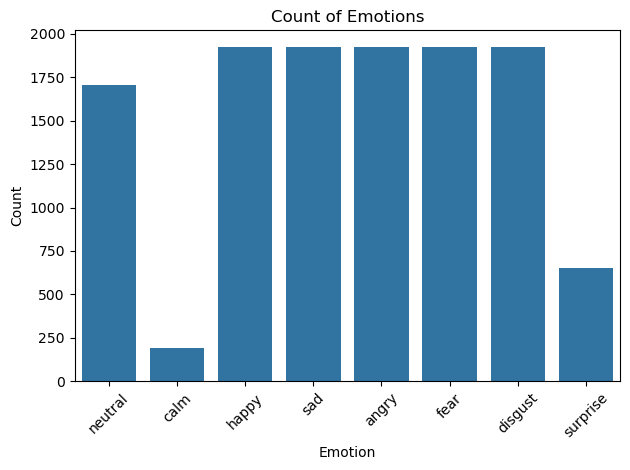

In [266]:
plt.figure()
sns.countplot(x="Emotions", data=data_path)
plt.title("Count of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Extracting 4 Main Emotions

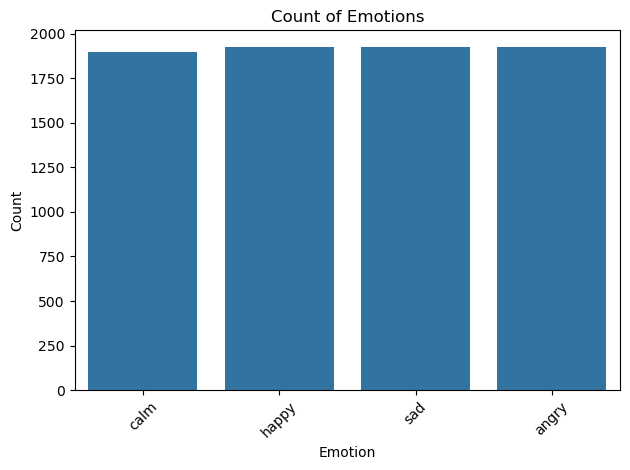

In [267]:
# combining neutral into calm
data_path["Emotions"] = data_path["Emotions"].replace("neutral", "calm")

emotions = ["calm", "happy", "sad", "angry"]
data_subset = data_path[data_path["Emotions"].isin(emotions)]

plt.figure()
sns.countplot(x="Emotions", data=data_subset)
plt.title("Count of Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Waveplots and Spectrograms of Each Emotion

In [268]:
def create_waveplot(data, sr, emotion_label):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot For Audio With "{emotion_label}" Emotion', fontsize=15)
    
    time = np.linspace(0, len(data) / sr, num=len(data))
    plt.plot(time, data)
    
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()

def create_spectrogram(data, sr, emotion_label):
    
    # short-time fourier transformation to find frequency x time matrix
    window_ms = 25
    nperseg = int(sr * window_ms / 1000)
    
    f, t, Zxx = signal.stft(data, fs=sr, nperseg=nperseg)

    # convert magnitude to db, allowing visual interpretation for humans
    Zxx_magnitude = np.abs(Zxx)
    Zxx_db = 20 * np.log10(Zxx_magnitude + 1e-10)

    plt.figure(figsize=(12, 3))
    plt.title(f'Spectrogram for audio with "{emotion_label}" emotion', fontsize=15)
    plt.pcolormesh(t, f, Zxx_db, shading='gouraud', cmap='magma', vmin = -125)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Intensity [dB]')
    plt.tight_layout()
    plt.show()

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\3610595851.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(path)


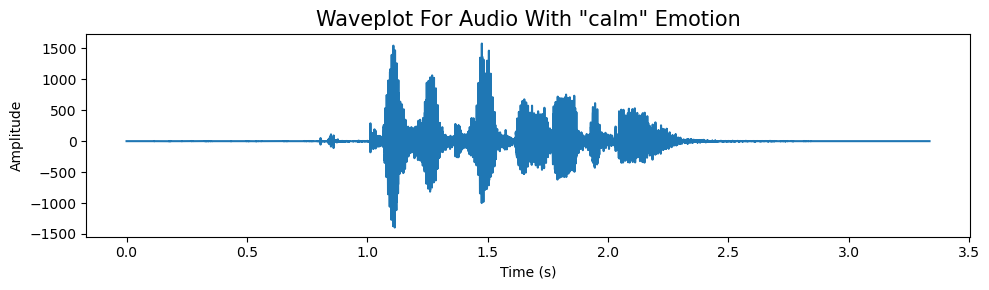

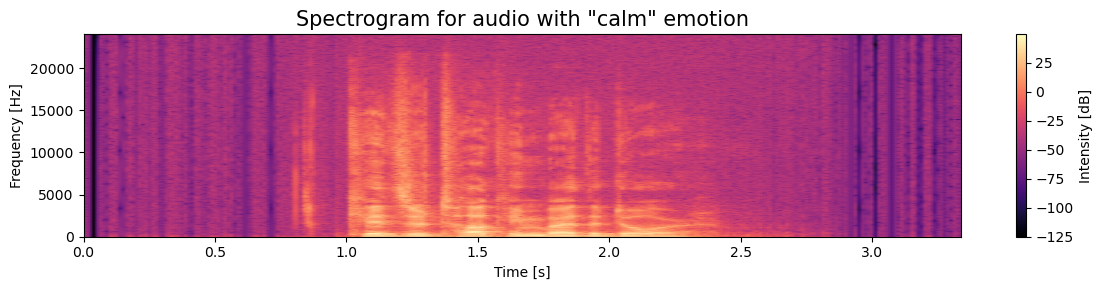

In [269]:
emotion='calm'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
sampling_rate, data = wavfile.read(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\105886060.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(path)


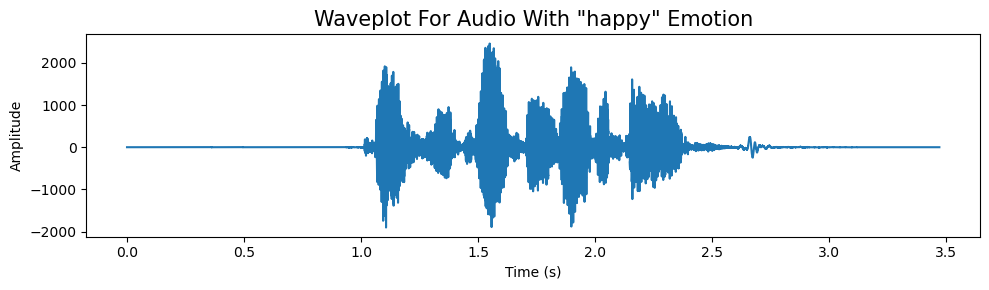

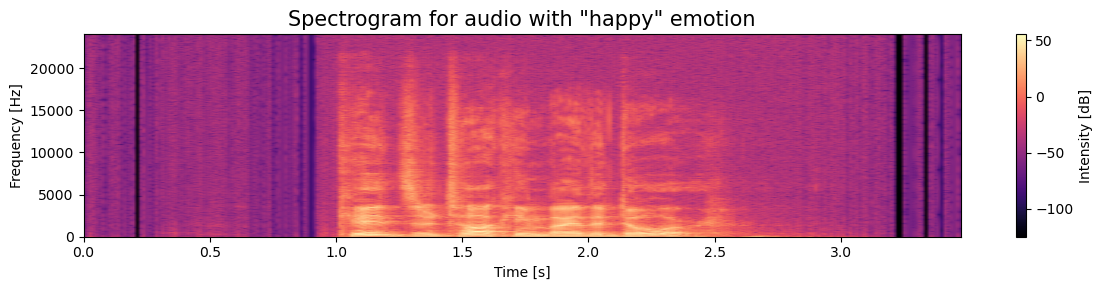

In [270]:
emotion='happy'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
sampling_rate, data = wavfile.read(path)


create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\3208827664.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(path)


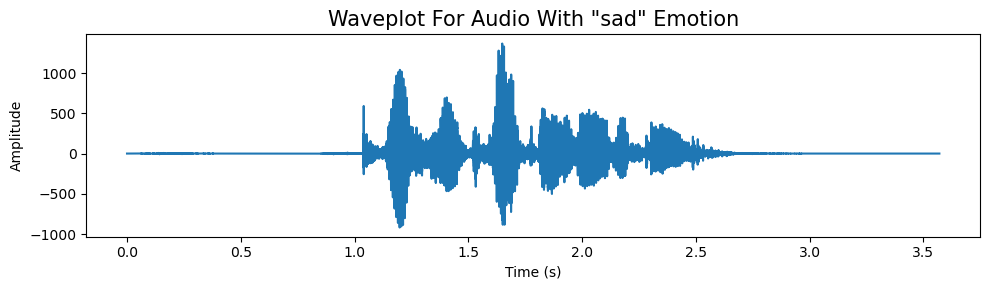

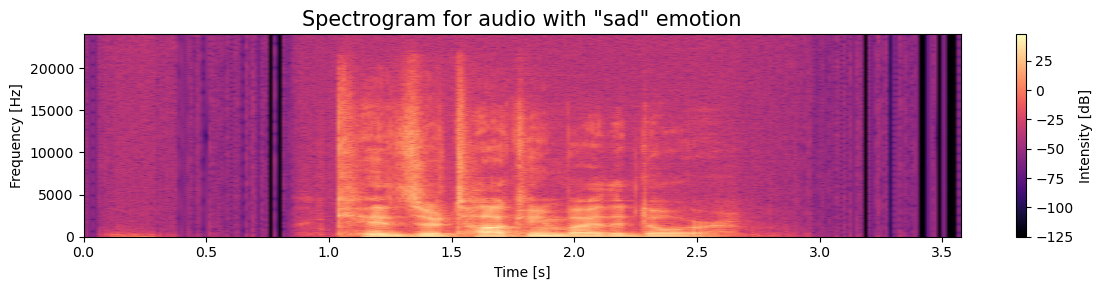

In [271]:
emotion='sad'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
sampling_rate, data = wavfile.read(path)


create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

C:\Users\mattl\AppData\Local\Temp\ipykernel_31484\3715123597.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  sampling_rate, data = wavfile.read(path)


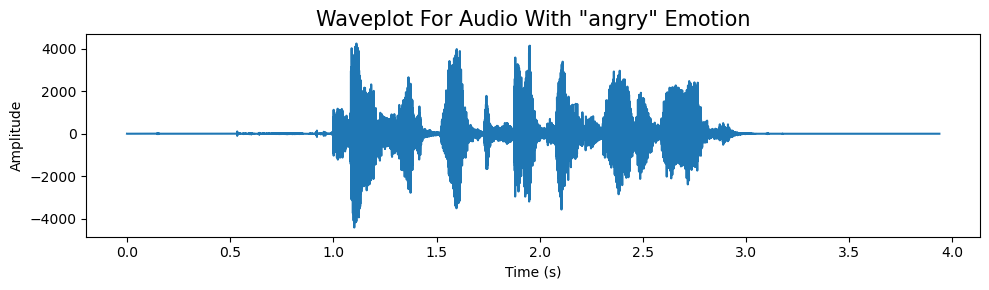

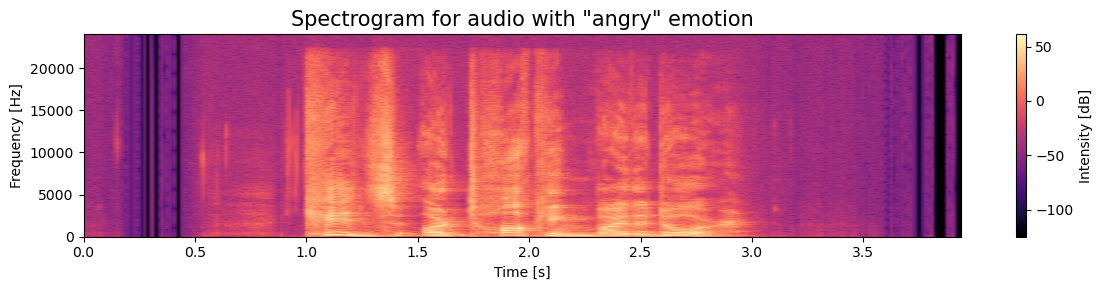

In [272]:
emotion='angry'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
sampling_rate, data = wavfile.read(path)


create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

# Data Augmentation

#### https://medium.com/heuristics/audio-signal-feature-extraction-and-clustering-935319d2225

Zero Cross Rate
Energy
Entropy of Energy
Spectral Centroid
Spectral Spread
Spectral Entropy
Spectral Flux
Spectral Roll off
MFCC
Chroma Vector
Chroma Deviation

#### https://www.researchgate.net/publication/365515286_Data_Augmentation_and_Deep_Learning_Methods_in_Sound_Classification_A_Systematic_Review
Mel-Frequency Cepstral Coefficients (MFCCs): Widely used for capturing the timbral aspects of audio signals.​

Log-Mel Spectrograms: Providing a time-frequency representation that aligns with human auditory perception.​

Chroma Features: Capturing harmonic and pitch content, useful in music-related tasks.

#### https://arxiv.org/abs/2306.05621

Raw audio was converted into LMS features

These LMS features were input into a deep CNN to learn an embedding

The CNN-generated embeddings were then clustered using Agglomerative Hierarchical Clustering (AHC)

This whole process was jointly optimized, refining the CNN and clustering assignments together

#### https://arxiv.org/abs/2503.18579

## Feature Extraction 1

## THIS TAKES 6 MINUTES TO RUN DO NOT RUN

In [391]:
# 1024 - 2048 is common for speech emotion recognition
frame_length = 2048
hop_length = int(2048 * 0.25)
eps = 1e-10

features = []

paths = np.array(data_subset.Path)

for path in paths:
    try:
        data, sampling_rate = librosa.load(path, sr=None, mono=True)

        # zero crossing
        zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
        zcr_mean = np.mean(zcr)

        # energy
        energy = np.array([
            np.sum(np.square(data[i:i+frame_length]))
            for i in range(0, len(data), hop_length)
        ])
        energy_mean = np.mean(energy)

        # entropy of energy
        energy_normalized = energy / (np.sum(energy) + eps)
        entropy = -np.sum(energy_normalized * np.log2(energy_normalized + eps))
        entropy /= np.log2(len(energy) + eps)

        # spec centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sampling_rate, hop_length=hop_length)
        spectral_centroid_mean = np.mean(spectral_centroid)

        # spec spread
        spectral_spread = librosa.feature.spectral_bandwidth(y=data, sr=sampling_rate, hop_length=hop_length)
        spectral_spread_mean = np.mean(spectral_spread)

        # spec entropy
        S = np.abs(librosa.stft(data))**2
        ps = S / (np.sum(S, axis=0, keepdims=True) + eps)
        spectral_entropy = -np.mean(np.sum(ps * np.log2(ps + eps), axis=0))

        # spec flux
        onset_env = librosa.onset.onset_strength(y=data, sr=sampling_rate)
        spectral_flux = np.mean(np.diff(onset_env)**2)

        # spec roll-off
        spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sampling_rate, hop_length=hop_length)
        spectral_rolloff_mean = np.mean(spectral_rolloff)

        # mfcc
        mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)
        mfcc_means = np.mean(mfcc, axis=1)

        # chroma
        chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate, hop_length=hop_length)
        chroma_mean = np.mean(chroma)
        chroma_std = np.std(chroma)

        features.append({
            'path': path,
            'zcr': zcr_mean,
            'energy': energy_mean,
            'entropy': entropy,
            'spectral_centroid': spectral_centroid_mean,
            'spectral_spread': spectral_spread_mean,
            'spectral_entropy': spectral_entropy,
            'spectral_flux': spectral_flux,
            'spectral_rolloff': spectral_rolloff_mean,
            'chroma_mean': chroma_mean,
            'chroma_std': chroma_std,
            **{f'mfcc_{i+1}': mfcc_means[i] for i in range(len(mfcc_means))}
        })

    except Exception as e:
        print(f"Error processing {path}: {e}")

features_df = pd.DataFrame(features)


c:\Users\mattl\Anaconda3\envs\projectenv\Lib\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


In [392]:
features_df

path       zcr    energy  \
0     C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.050476  0.032745   
1     C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.052904  0.037552   
2     C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.046627  0.052850   
3     C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.053835  0.048759   
4     C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.045929  0.017877   
...                                                 ...       ...       ...   
7659  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.010200  0.104072   
7660  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.010143  0.055519   
7661  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.015347  0.097158   
7662  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.011937  0.133002   
7663  C:/Users/mattl/OneDrive/Desktop/CS 4375 Machin...  0.005629  0.073745   

       entropy  spectral_centroid  spectral_spread  spectral_entropy  \
0     0.733407        7416.297748      5551.291828          6.676643   
1     0.729771        7135.571471      5653.771579          6.523646   
2     0.731930        7239.265648      5641.048020          6.489656   
3     0.708818        7008.958169      5802.315322          6.420768   
4     0.728417        6997.311810      5518.637359          6.379463   
...        ...                ...              ...               ...   
7659  0.858780         986.081447      2353.481782          2.197437   
7660  0.852362        1243.422151      2769.017801          2.108366   
7661  0.810376        1274.090873      2606.050507          2.420738   
7662  0.822104        1072.826248      2410.272705          2.404346   
7663  0.903903         920.725187      2413.288559          1.902666   

      spectral_flux  spectral_rolloff  chroma_mean  ...     mfcc_4     mfcc_5  \
0          2.099920      13285.735887     0.633091  ...  12.205300   5.510278   
1          2.988514      13191.643371     0.629568  ...  13.122541   7.836950   
2          3.015285      13279.137826     0.619984  ...  11.924190   6.421723   
3          1.788670      13272.074245     0.612607  ...  13.230726   6.190845   
4          2.447127      12649.543486     0.608243  ...  14.557394   6.454188   
...             ...               ...          ...  ...        ...        ...   
7659       0.741068       1298.221919     0.565710  ...  31.354355  26.141361   
7660       0.719272       1867.117404     0.574602  ...  32.648708  32.408394   
7661       0.538362       1906.912522     0.559427  ...  31.823162  28.482529   
7662       0.653227       1453.784846     0.507589  ...  30.597017  33.111004   
7663       0.490594       1227.773697     0.585265  ...  34.947277  32.742447   

         mfcc_6    mfcc_7    mfcc_8    mfcc_9   mfcc_10   mfcc_11   mfcc_12  \
0     13.667408 -2.983828  3.098029 -3.310813 -1.564384 -7.861652 -2.124282   
1     14.411290 -4.111360  4.468973 -3.539367 -3.658607 -7.648504 -1.477077   
2     11.011614 -2.878103  4.509558 -4.476109 -2.671549 -7.499283 -2.962266   
3     12.628252 -1.675169  5.657494 -4.950634 -3.477545 -7.416558 -1.937004   
4     14.631508 -3.004551  4.620970 -5.200016 -0.707430 -7.790287 -3.564948   
...         ...       ...       ...       ...       ...       ...       ...   
7659   9.365277  1.306821  3.336578  6.540576  0.231255 -7.662233 -5.437235   
7660  13.189351  4.412016 -3.897228 -3.129529 -1.632973 -5.197497 -1.427634   
7661  11.341405  2.722028 -2.103976 -1.002852 -2.540918 -6.617329 -3.263237   
7662  17.535822  0.259548 -5.715102 -2.194063 -3.399520 -6.984387 -4.706716   
7663  12.714637  3.266935 -0.969400  2.271375  0.236315 -4.620147  0.252159   

       mfcc_13  
0     2.849204  
1     3.031821  
2     1.873485  
3     2.271525  
4     2.180970  
...        ...  
7659 -2.191782  
7660 -0.818681  
7661 -1.405710  
7662 -4.152811  
7663  0.548356  

[7664 rows x 24 columns]

## Audio Augmentation

1. Increases data diversity
Augmentation (e.g., noise, pitch shift, time stretch) creates new variations of existing data. This forces the model to learn robust, generalizable patterns instead of memorizing specific examples.

2. Acts like regularization
Augmentations introduce controlled "noise" into training. This has a similar effect to regularization techniques like dropout — it prevents the model from becoming too confident in exact training instances.

3. Simulates real-world variability
In real-life speech, people speak faster/slower, with different accents, intonation, and background noise. Augmentation simulates these differences, 
making the model more resilient and improving generalization to unseen data.

In [ ]:
# 1. Time Stretching
def stretch(data, rate=1.1):
    return librosa.effects.time_stretch(data, rate=1.1)


# 2. Pitch Shifting
def shift(data, sr, n_steps=1):
    return librosa.effects.pitch_shift(data, sr=sr, n_steps=n_steps)

# 3. Additive Noise
def add_noise(data, noise_level=0.000005):
    noise = np.random.normal(0, noise_level, data.shape)
    return data + noise

# 4. Time Shifting
def time_shift(data, shift_max=0.2):
    shift = int(np.random.uniform(-0.2, shift_max) * len(data))
    return np.roll(data, shift)

# 5. Dynamic Range Compression
def compress_dynamic_range(data, factor=2.0):
    return np.sign(data) * (np.abs(data) ** (1.0 / factor))

### Augmented Audio Waveplots and Spectrogram of Each Emotion 

In [323]:
def create_waveplot_augmented(data, sr, emotion_label):
    plt.figure(figsize=(10, 3))
    plt.title(f'Waveplot For Audio With "{emotion_label}" Emotion After Augmentation', fontsize=15)
    
    time = np.linspace(0, len(data) / sr, num=len(data))
    plt.plot(time, data)
    
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.tight_layout()
    plt.show()
    
def create_spectrogram_augmented(data, sr, emotion_label):
    
    # short-time fourier transformation to find frequency x time matrix
    window_ms = 25
    nperseg = int(sr * window_ms / 1000)
    
    f, t, Zxx = signal.stft(data, fs=sr, nperseg=nperseg)

    # convert magnitude to db, allowing visual interpretation for humans
    Zxx_magnitude = np.abs(Zxx)
    Zxx_db = 20 * np.log10(Zxx_magnitude + 1e-10)

    plt.figure(figsize=(12, 3))
    plt.title(f'Spectrogram For Audio With "{emotion_label}" Emotion After Augmentation', fontsize=15)
    plt.pcolormesh(t, f, Zxx_db, shading='gouraud', cmap='magma', vmin = -125)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [s]')
    plt.colorbar(label='Intensity [dB]')
    plt.tight_layout()
    plt.show()

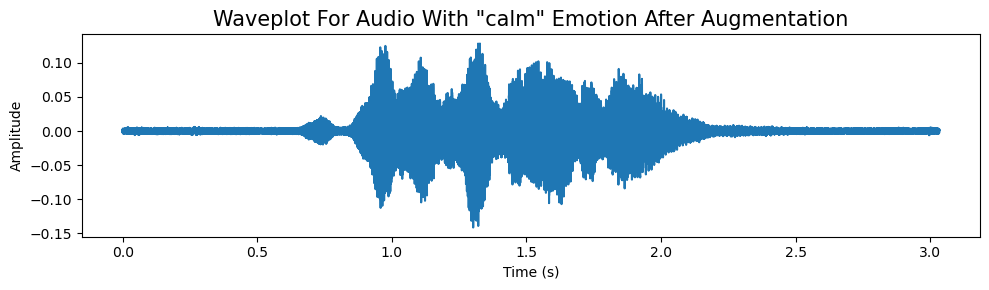

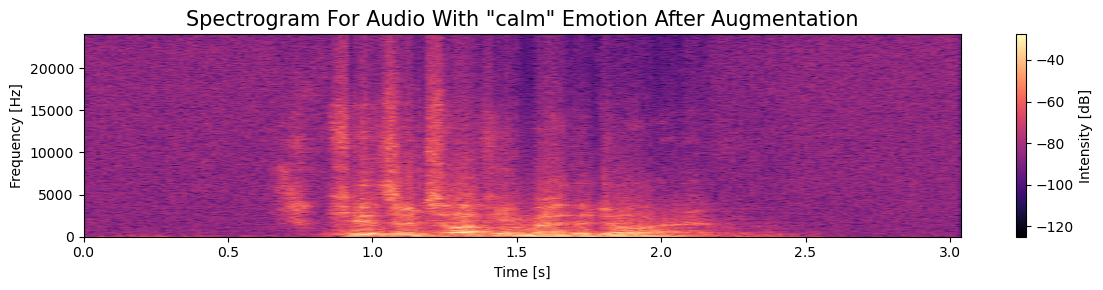

In [324]:
emotion='calm'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path, sr=None, mono=True)

data = stretch(data, rate=1.1)
data = shift(data, sampling_rate, n_steps=1)
data = add_noise(data, noise_level=0.000005)
data = time_shift(data, shift_max=0.2)
data = compress_dynamic_range(data, factor=2.0)


create_waveplot_augmented(data, sampling_rate, emotion)
create_spectrogram_augmented(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

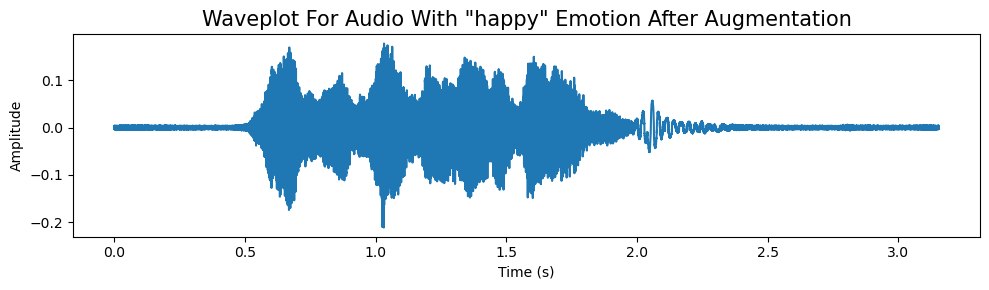

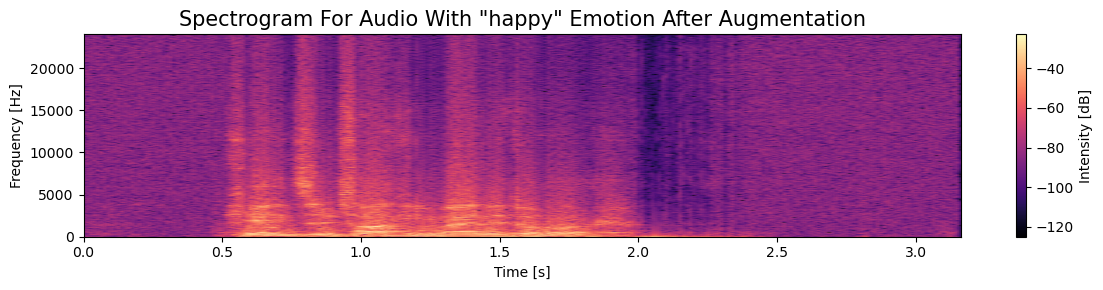

In [325]:
emotion='happy'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path, sr=None, mono=True)

data = stretch(data, rate=1.1)
data = shift(data, sampling_rate, n_steps=1)
data = add_noise(data, noise_level=0.000005)
data = time_shift(data, shift_max=0.2)
data = compress_dynamic_range(data, factor=2.0)


create_waveplot_augmented(data, sampling_rate, emotion)
create_spectrogram_augmented(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

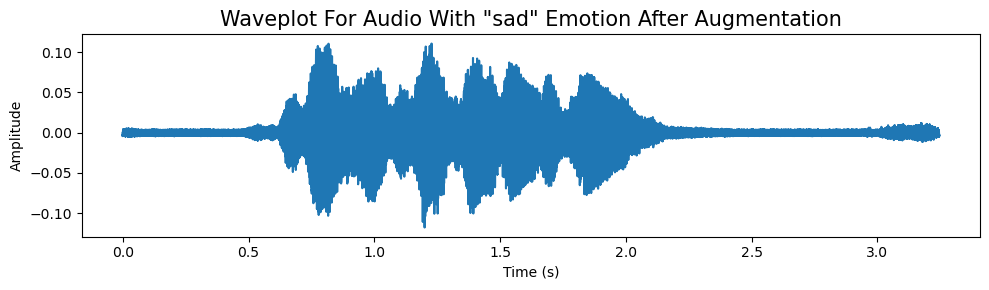

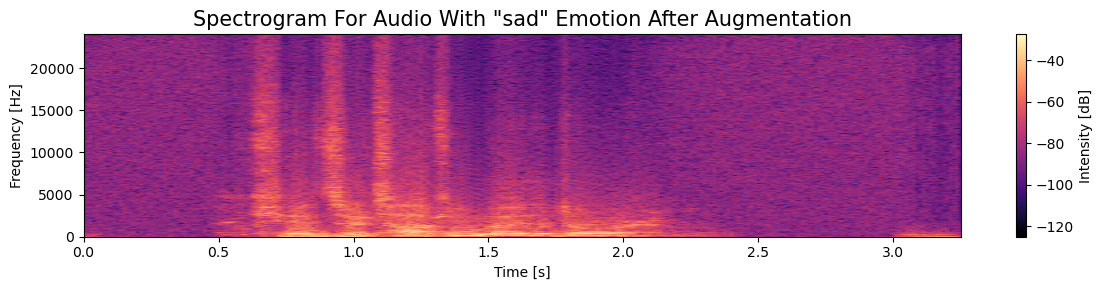

In [326]:
emotion='sad'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path, sr=None, mono=True)

data = stretch(data, rate=1.1)
data = shift(data, sampling_rate, n_steps=1)
data = add_noise(data, noise_level=0.000005)
data = time_shift(data, shift_max=0.2)
data = compress_dynamic_range(data, factor=2.0)


create_waveplot_augmented(data, sampling_rate, emotion)
create_spectrogram_augmented(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

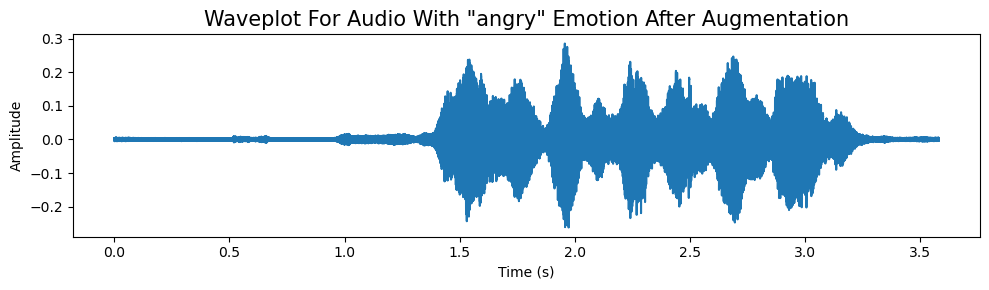

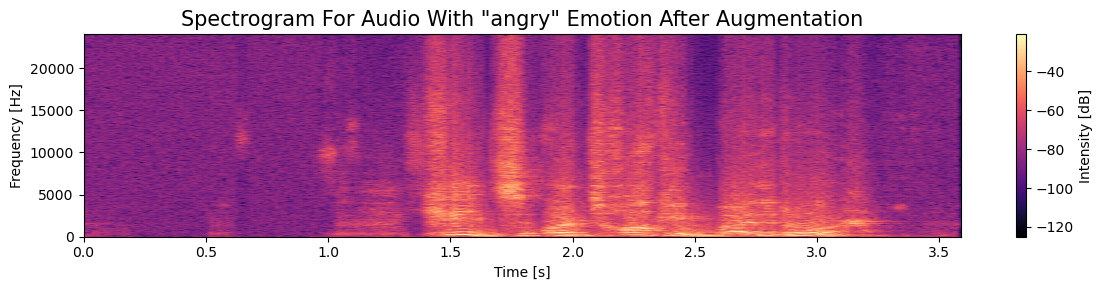

In [327]:
emotion='angry'
path = np.array(data_subset.Path[data_subset.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path, sr=None, mono=True)

data = stretch(data, rate=1.1)
data = shift(data, sampling_rate, n_steps=1)
data = add_noise(data, noise_level=0.000005)
data = time_shift(data, shift_max=0.2)
data = compress_dynamic_range(data, factor=2.0)


create_waveplot_augmented(data, sampling_rate, emotion)
create_spectrogram_augmented(data, sampling_rate, emotion)

Audio(data, rate=sampling_rate)

## Feature Extraction with Augmentation


In [ ]:
# features_augmented = []

# # Loop over both path and label from data_subset
# for row in data_subset.itertuples(index=False):
#     path = row.Path
#     emotion = row.Emotions

#     try:
#         data, sampling_rate = librosa.load(path, sr=None, mono=True)

#         # Apply augmentations
#         data = stretch(data, rate=1.1)
#         data = shift(data, sampling_rate, n_steps=1)
#         data = add_noise(data, noise_level=0.005)
#         data = time_shift(data, shift_max=0.2)
#         data = compress_dynamic_range(data, factor=2.0)

#         # Feature extraction
#         zcr = np.mean(librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length))

#         energy = np.array([
#             np.sum(np.square(data[i:i+frame_length]))
#             for i in range(0, len(data), hop_length)
#         ])
#         energy_mean = np.mean(energy)

#         energy_normalized = energy / (np.sum(energy) + eps)
#         entropy = -np.sum(energy_normalized * np.log2(energy_normalized + eps))
#         entropy /= np.log2(len(energy) + eps)

#         spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=data, sr=sampling_rate, hop_length=hop_length))
#         spectral_spread = np.mean(librosa.feature.spectral_bandwidth(y=data, sr=sampling_rate, hop_length=hop_length))

#         S = np.abs(librosa.stft(data))**2
#         ps = S / (np.sum(S, axis=0, keepdims=True) + eps)
#         spectral_entropy = -np.mean(np.sum(ps * np.log2(ps + eps), axis=0))

#         onset_env = librosa.onset.onset_strength(y=data, sr=sampling_rate)
#         spectral_flux = np.mean(np.diff(onset_env)**2)

#         spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=data, sr=sampling_rate, hop_length=hop_length))

#         mfcc_means = np.mean(librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13), axis=1)

#         chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate, hop_length=hop_length)
#         chroma_mean = np.mean(chroma)
#         chroma_std = np.std(chroma)

#         features_augmented.append({
#             'path': path + "_augmented",
#             'Emotions': emotion,
#             'zcr': zcr,
#             'energy': energy_mean,
#             'entropy': entropy,
#             'spectral_centroid': spectral_centroid,
#             'spectral_spread': spectral_spread,
#             'spectral_entropy': spectral_entropy,
#             'spectral_flux': spectral_flux,
#             'spectral_rolloff': spectral_rolloff,
#             'chroma_mean': chroma_mean,
#             'chroma_std': chroma_std,
#             **{f'mfcc_{i+1}': mfcc_means[i] for i in range(len(mfcc_means))}
#         })

#     except Exception as e:
#         print(f"Error processing {path}: {e}")

# # Convert to DataFrame
# features_df_augmented = pd.DataFrame(features_augmented)


## THIS TAKES 12 MINUTES TO RUN DO NOT RUN

In [ ]:


features_augmented = []

paths_augmented = np.array(data_subset.Path)
# paths_augmented = np.array(data_subset.Path[:456789876545678])


for path in paths_augmented:
    try:
        data, sampling_rate = librosa.load(path, sr=None, mono=True)
        
        data = stretch(data, rate=1.1)
        data = shift(data, sampling_rate, n_steps=1)
        data = add_noise(data, noise_level=0.005)
        data = time_shift(data, shift_max=0.2)
        data = compress_dynamic_range(data, factor=2.0)
        
        # zero crossing
        zcr = librosa.feature.zero_crossing_rate(data, frame_length=frame_length, hop_length=hop_length)
        zcr_mean = np.mean(zcr)

        # energy
        energy = np.array([
            np.sum(np.square(data[i:i+frame_length]))
            for i in range(0, len(data), hop_length)
        ])
        energy_mean = np.mean(energy)

        # entropy of energy
        energy_normalized = energy / (np.sum(energy) + eps)
        entropy = -np.sum(energy_normalized * np.log2(energy_normalized + eps))
        entropy /= np.log2(len(energy) + eps)

        # spec centroid
        spectral_centroid = librosa.feature.spectral_centroid(y=data, sr=sampling_rate, hop_length=hop_length)
        spectral_centroid_mean = np.mean(spectral_centroid)

        # spec spread
        spectral_spread = librosa.feature.spectral_bandwidth(y=data, sr=sampling_rate, hop_length=hop_length)
        spectral_spread_mean = np.mean(spectral_spread)

        # spec entropy
        S = np.abs(librosa.stft(data))**2
        ps = S / (np.sum(S, axis=0, keepdims=True) + eps)
        spectral_entropy = -np.mean(np.sum(ps * np.log2(ps + eps), axis=0))

        # spec flux
        onset_env = librosa.onset.onset_strength(y=data, sr=sampling_rate)
        spectral_flux = np.mean(np.diff(onset_env)**2)

        # spec roll-off
        spectral_rolloff = librosa.feature.spectral_rolloff(y=data, sr=sampling_rate, hop_length=hop_length)
        spectral_rolloff_mean = np.mean(spectral_rolloff)

        # mfcc
        mfcc = librosa.feature.mfcc(y=data, sr=sampling_rate, n_mfcc=13)
        mfcc_means = np.mean(mfcc, axis=1)

        # chroma
        chroma = librosa.feature.chroma_stft(y=data, sr=sampling_rate, hop_length=hop_length)
        chroma_mean = np.mean(chroma)
        chroma_std = np.std(chroma)

        features_augmented.append({
            'path': path,
            'zcr': zcr_mean,
            'energy': energy_mean,
            'entropy': entropy,
            'spectral_centroid': spectral_centroid_mean,
            'spectral_spread': spectral_spread_mean,
            'spectral_entropy': spectral_entropy,
            'spectral_flux': spectral_flux,
            'spectral_rolloff': spectral_rolloff_mean,
            'chroma_mean': chroma_mean,
            'chroma_std': chroma_std,
            **{f'mfcc_{i+1}': mfcc_means[i] for i in range(len(mfcc_means))}
        })

    except Exception as e:
        print(f"Error processing {path}: {e}")

features_df_augmented = pd.DataFrame(features_augmented)


### REMOVE LATER

In [ ]:
features_df_augmented = features_df_augmented.drop(columns=['Emotions'], errors='ignore').merge(
    data_subset[['Path', 'Emotions']],
    how='left',
    left_on='path',
    right_on='Path'
).drop(columns='Path')

features_df = features_df.drop(columns=['Emotions'], errors='ignore').merge(
    data_subset[['Path', 'Emotions']],
    how='left',
    left_on='path',
    right_on='Path'
).drop(columns='Path')




## Feature Importance

In [413]:
features_df["source"] = "original"
features_df_augmented["source"] = "augmented"

features_df_concatenated = pd.concat([features_df, features_df_augmented], ignore_index=True)

### 1) Mutual Information

Original Dataset

              Feature  Mutual_Information
10             mfcc_1            0.315155
1              energy            0.312877
6       spectral_flux            0.188198
14             mfcc_5            0.172538
12             mfcc_3            0.164331
2             entropy            0.125298
15             mfcc_6            0.117316
0                 zcr            0.100950
3   spectral_centroid            0.099975
11             mfcc_2            0.085329


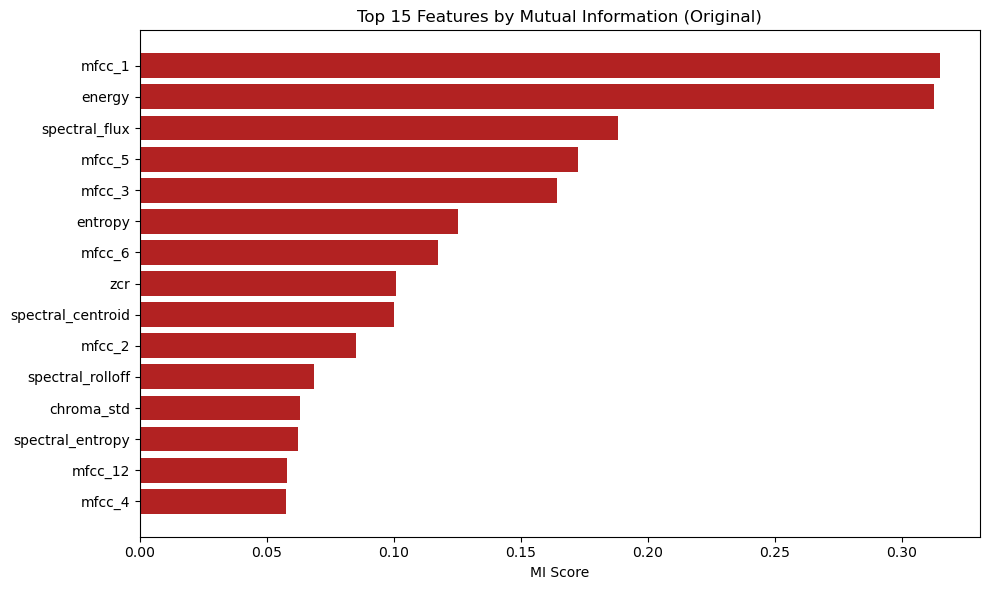

In [407]:
X_original = features_df.drop(columns=["path", "Emotions", "source"], errors='ignore')
y_original = features_df["Emotions"]
mi_scores = mutual_info_classif(X_original, y_original, discrete_features=False, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X_original.columns,
    'Mutual_Information': mi_scores
}).sort_values(by='Mutual_Information', ascending=False)

print(mi_df.head(10))
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'][:15][::-1], mi_df['Mutual_Information'][:15][::-1], color = 'firebrick')
plt.title("Top 15 Features by Mutual Information (Original)")
plt.xlabel("MI Score")
plt.tight_layout()
plt.show()

Augmented Dataset

              Feature  Mutual_Information
7    spectral_rolloff            0.443982
10             mfcc_1            0.363367
4     spectral_spread            0.334771
2             entropy            0.319422
3   spectral_centroid            0.307477
1              energy            0.304010
14             mfcc_5            0.275107
12             mfcc_3            0.204185
15             mfcc_6            0.195424
5    spectral_entropy            0.170960


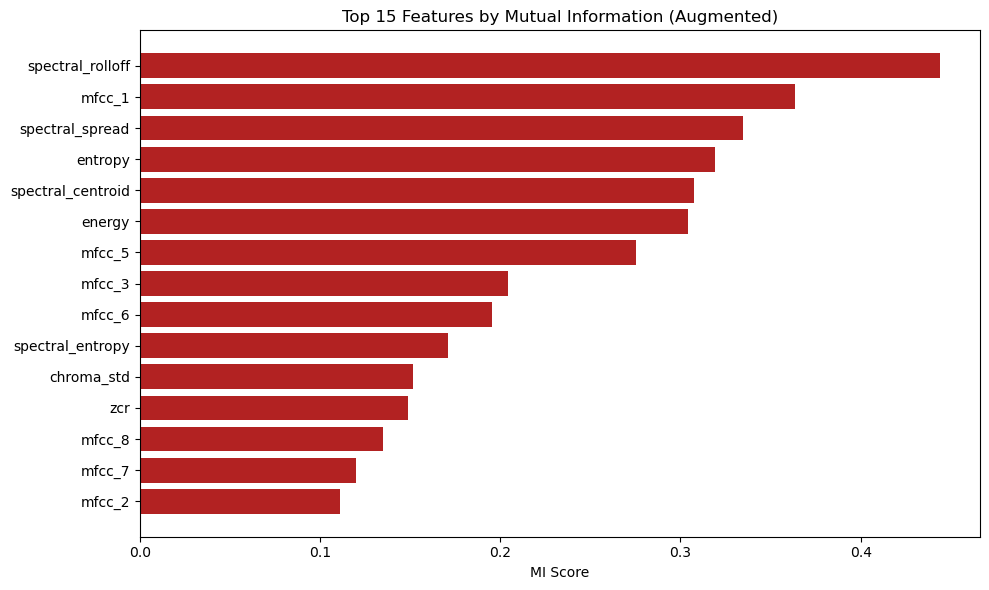

In [411]:
X_augmented = features_df_augmented.drop(columns=["path", "Emotions", "source"], errors='ignore')
y_augmented = features_df_augmented["Emotions"]
mi_scores = mutual_info_classif(X_augmented, y_augmented, discrete_features=False, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X_augmented.columns,
    'Mutual_Information': mi_scores
}).sort_values(by='Mutual_Information', ascending=False)

print(mi_df.head(10))
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'][:15][::-1], mi_df['Mutual_Information'][:15][::-1], color = 'firebrick')
plt.title("Top 15 Features by Mutual Information (Augmented)")
plt.xlabel("MI Score")
plt.tight_layout()
plt.show()

Original + Augmented Dataset

              Feature  Mutual_Information
10             mfcc_1            0.330034
1              energy            0.253473
7    spectral_rolloff            0.217885
14             mfcc_5            0.189660
3   spectral_centroid            0.166019
4     spectral_spread            0.143541
15             mfcc_6            0.137460
12             mfcc_3            0.132089
0                 zcr            0.122454
6       spectral_flux            0.122220


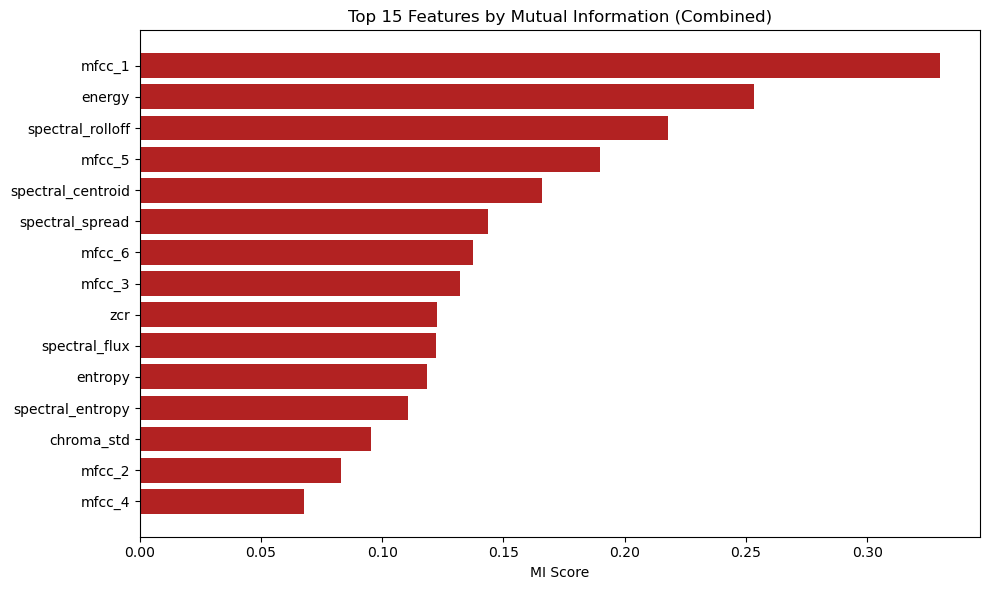

In [414]:
X_combined = features_df_concatenated.drop(columns=["path", "Emotions", "source"], errors='ignore')
y_combined = features_df_concatenated["Emotions"]
mi_scores = mutual_info_classif(X_combined, y_combined, discrete_features=False, random_state=42)

mi_df = pd.DataFrame({
    'Feature': X_combined.columns,
    'Mutual_Information': mi_scores
}).sort_values(by='Mutual_Information', ascending=False)

print(mi_df.head(10))
plt.figure(figsize=(10, 6))
plt.barh(mi_df['Feature'][:15][::-1], mi_df['Mutual_Information'][:15][::-1], color = 'firebrick')
plt.title("Top 15 Features by Mutual Information (Combined)")
plt.xlabel("MI Score")
plt.tight_layout()
plt.show()

### 2) Permutation Importance

tests each combination of features on gbm (faster, did not wanna test on our ovr ensemble). tests performance each time we take a feature out and compares

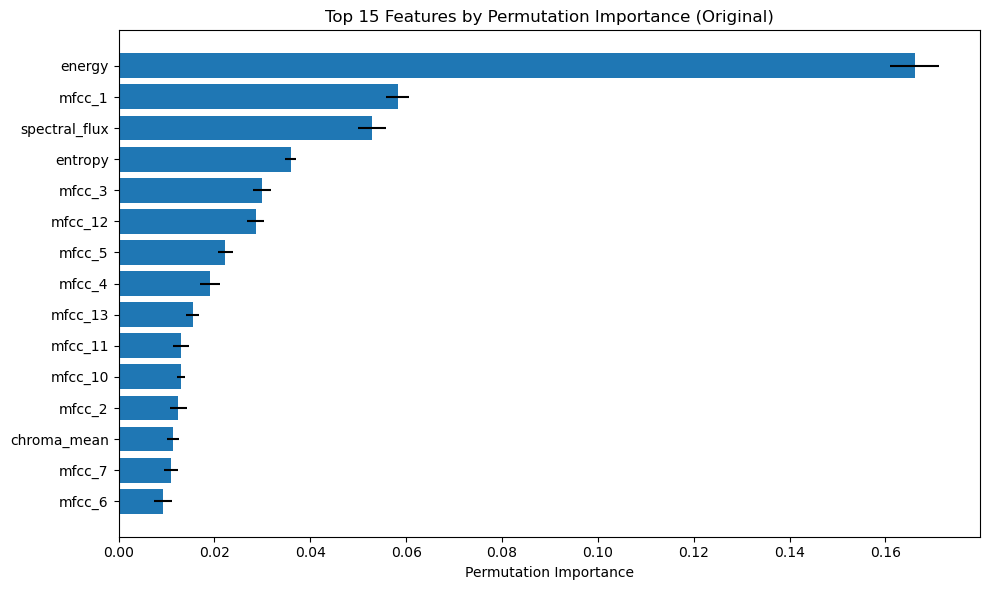

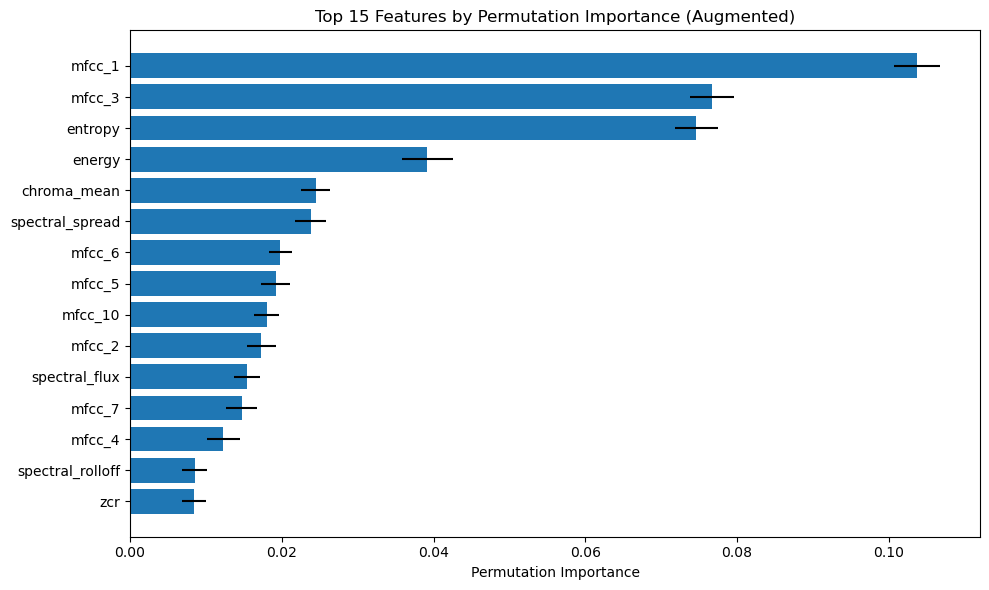

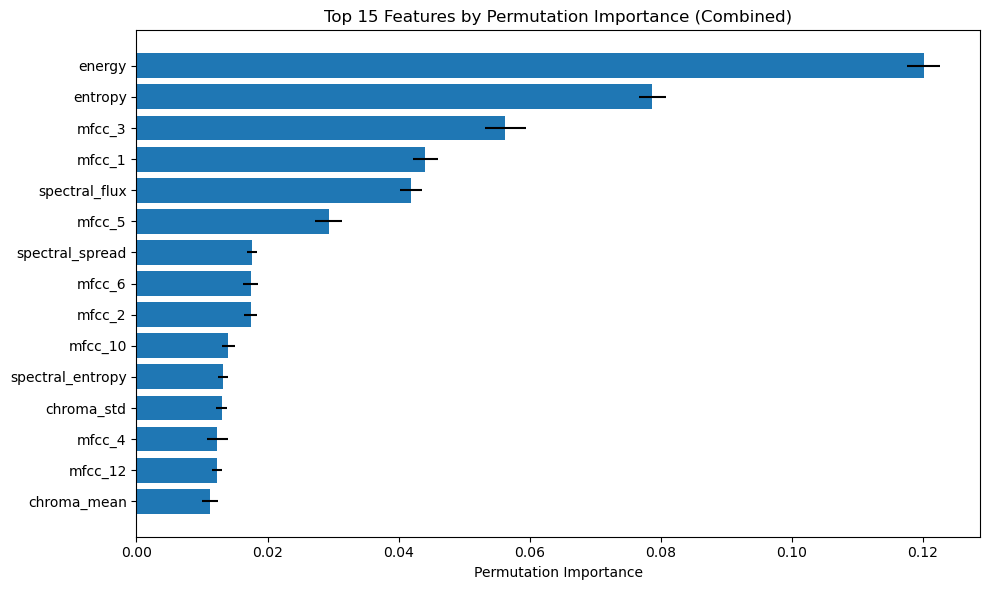

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

def compute_permutation_importance(X, y, feature_names, dataset_name="Dataset"):
    # encoder
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = GradientBoostingClassifier(random_state=42)
    model.fit(X_scaled, y_encoded)

    result = permutation_importance(model, X_scaled, y_encoded, n_repeats=10, random_state=42)

    sorted_idx = result.importances_mean.argsort()[::-1]
    perm_df = pd.DataFrame({
        "Feature": feature_names[sorted_idx],
        "Importance_Mean": result.importances_mean[sorted_idx],
        "Importance_STD": result.importances_std[sorted_idx]
    })

    plt.figure(figsize=(10, 6))
    plt.barh(perm_df["Feature"][:15][::-1], perm_df["Importance_Mean"][:15][::-1],
             xerr=perm_df["Importance_STD"][:15][::-1])
    plt.xlabel("Permutation Importance")
    plt.title(f"Top 15 Features by Permutation Importance ({dataset_name})")
    plt.tight_layout()
    plt.show()

    return perm_df

perm_df_original = compute_permutation_importance(X_original, y_original, X_original.columns, "Original")
perm_df_augmented = compute_permutation_importance(X_augmented, y_augmented, X_augmented.columns, "Augmented")
perm_df_combined  = compute_permutation_importance(X_combined, y_combined, X_combined.columns, "Combined")


In [436]:
original_features = ['energy', 'mfcc_1', 'spectral_flux', 'entropy', 'mfcc_3',
 'mfcc_5', 'mfcc_6', 'zcr', 'spectral_centroid']

augmented_features = ['mfcc_1', 'mfcc_3', 'entropy', 'energy', 'chroma_mean',
 'spectral_spread', 'mfcc_5', 'mfcc_6', 'mfcc_2', 'spectral_flux']

combined_features = ['energy', 'entropy', 'mfcc_3', 'mfcc_1', 'spectral_flux',
 'mfcc_5', 'spectral_spread', 'mfcc_6', 'mfcc_2', 'mfcc_10']

features_df = features_df_copy.copy()
features_df_augmented = features_df_augmented_copy.copy()
features_df_concatenated = features_df_concatenated_copy.copy()

# features_df_copy = features_df.copy()
# features_df_augmented_copy = features_df_augmented.copy()
# features_df_concatenated_copy = features_df_concatenated.copy()

features_df_filtered = features_df[original_features + ['Emotions', 'source', 'path']]
features_df_augmented_filtered = features_df_augmented[augmented_features + ['Emotions', 'source', 'path']]
features_df_concatenated_filtered = features_df_concatenated[combined_features + ['Emotions', 'source', 'path']]

## Data Preparation

In [462]:
def prepare_ovr_data(df, param, test_size=0.2, random_state=42):
    X = df.drop(columns=["path", "Emotions", "source"], errors='ignore')
    y = df["Emotions"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train_mc, y_test_mc = train_test_split(
        X_scaled, y, test_size=test_size, stratify=y, random_state=random_state
    )

    # binary labels for ovr
    ovr_data = {}
    for emotion in y.unique():
        y_train_bin = (y_train_mc == emotion).astype(int)
        y_test_bin = (y_test_mc == emotion).astype(int)

        ovr_data[emotion] = {
            "X_train": X_train,
            "X_test": X_test,
            "y_train": y_train_bin,
            "y_test": y_test_bin
        }
    if param == True:    
        return ovr_data, y_test_mc, X_train, y_train_mc
    else:
        return ovr_data, y_test_mc


Might try to incorporate boostrapping idk tho

## OvR Model Stacking Ensembling

#### Testing for best parameters


Tuning hyperparameters for: LR
  Best parameters for LR: {'C': 0.1, 'solver': 'lbfgs'}


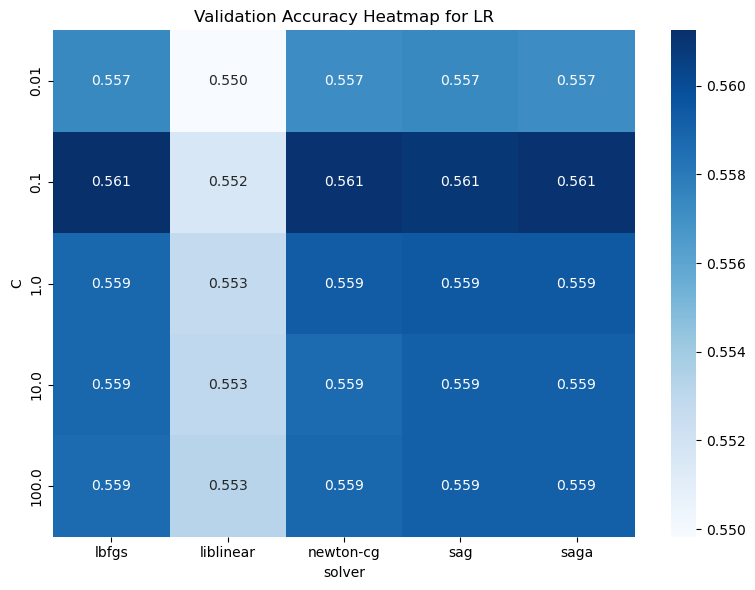


Tuning hyperparameters for: SVM
  Best parameters for SVM: {'C': 10, 'kernel': 'rbf'}


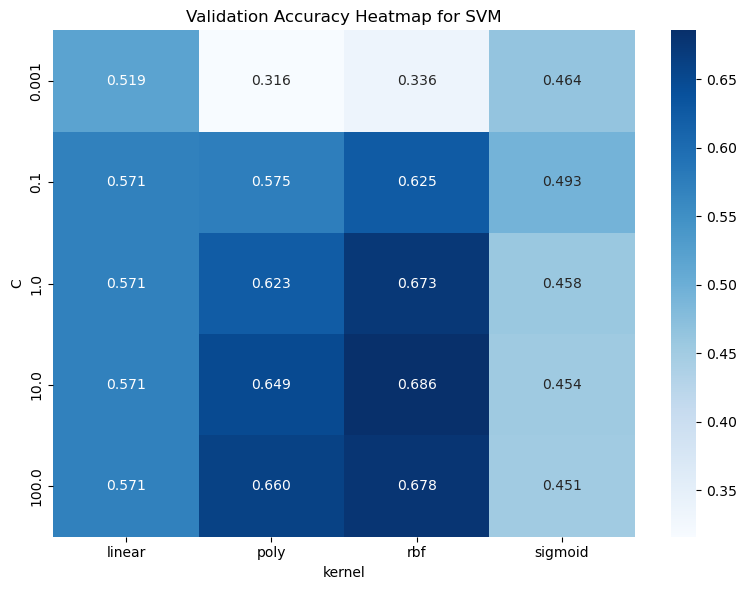


Tuning hyperparameters for: KNN
  Best parameters for KNN: {'n_neighbors': 7, 'weights': 'distance'}


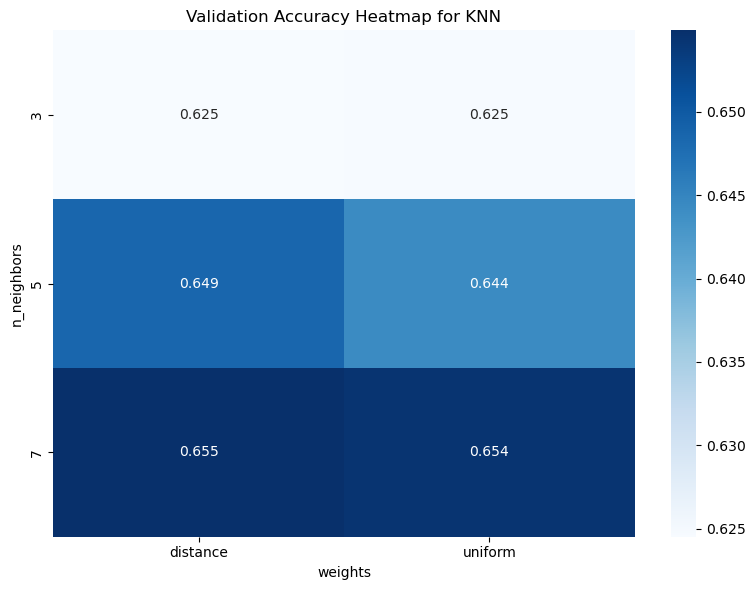


Tuning hyperparameters for: Tree
  Best parameters for Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


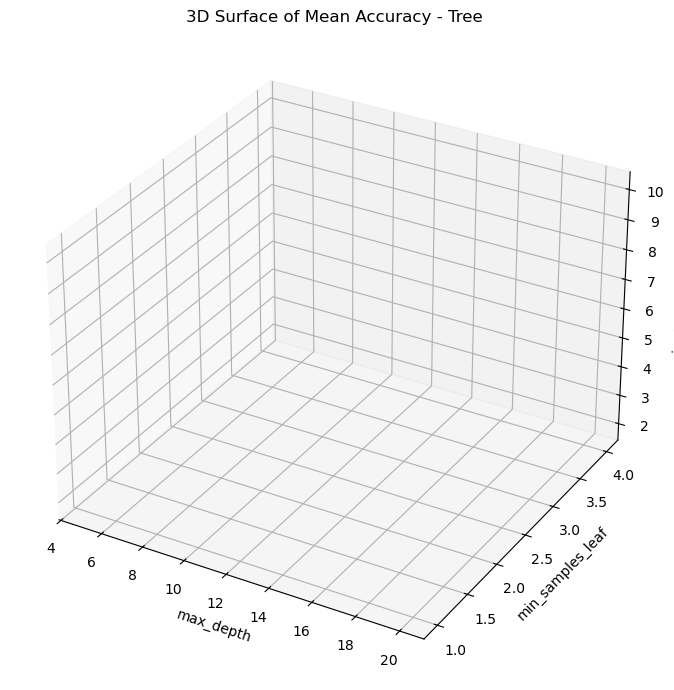


Tuning hyperparameters for: GB
  Best parameters for GB: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50}


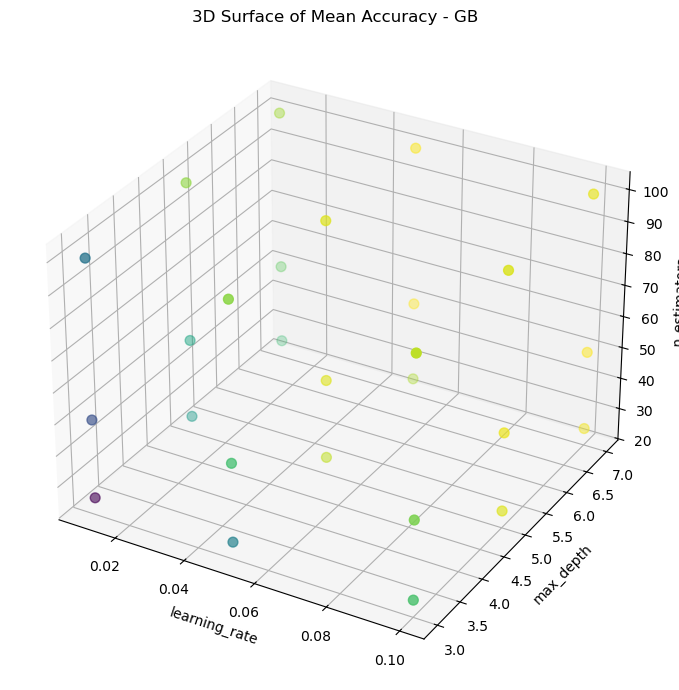


Best General Hyperparameters for All Models:
LR: {'C': 0.1, 'solver': 'lbfgs'}
SVM: {'C': 10, 'kernel': 'rbf'}
KNN: {'n_neighbors': 7, 'weights': 'distance'}
Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
GB: {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50}


In [479]:
def get_mini_ensemble():
    return {
        "LR": LogisticRegression(max_iter=500),
        "SVM": SVC(probability=True),
        "KNN": KNeighborsClassifier(),
        "Tree": DecisionTreeClassifier(),
        "GB": GradientBoostingClassifier()
    }

def define_parameter_grids():
    param_grids = {
        "LR": {'C': [100, 10, 1.0, 0.1, 0.01], 'solver': ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]},
        "SVM": {'C': [100, 10, 1.0, 0.1, 0.001], 'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
        "KNN": {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']},
        "Tree": {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
        "GB": {'n_estimators': [25, 50, 100], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 5, 7]}
    }
    return param_grids

def find_best_hyperparameters_general(X_train, y_train_mc):
    best_params_general = {}
    param_grids = define_parameter_grids()
    for name, model in get_mini_ensemble().items():
        print(f"\nTuning hyperparameters for: {name}")
        grid_search = GridSearchCV(model, param_grids[name], cv=3, scoring='accuracy', n_jobs=-1, return_train_score=False)
        grid_search.fit(X_train, y_train_mc)
        print(f"  Best parameters for {name}: {grid_search.best_params_}")
        best_params_general[name] = grid_search.best_params_
        if name == "GB" or name == "Tree":
            plot_3d_surface(name, grid_search)
        else:
            plot_heatmap(name, grid_search)
    return best_params_general

def plot_heatmap(model_name, grid_search):
    results = pd.DataFrame(grid_search.cv_results_)
    param_cols = [col for col in results.columns if col.startswith('param_')]

    pivot_table = results.pivot(index=param_cols[0], columns=param_cols[1], values='mean_test_score')
    plt.figure(figsize=(8, 6))
    sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="Blues")
    plt.title(f"Validation Accuracy Heatmap for {model_name}")
    plt.ylabel(param_cols[0].replace("param_", ""))
    plt.xlabel(param_cols[1].replace("param_", ""))
    plt.tight_layout()
    plt.show()

def plot_3d_surface(model_name, grid_search):
    results = pd.DataFrame(grid_search.cv_results_)

    param_cols = [col for col in results.columns if col.startswith('param_')]

    x_param = param_cols[0]
    y_param = param_cols[1]
    z_param = param_cols[2]

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    x_vals = results[x_param]
    y_vals = results[y_param]
    z_vals = results[z_param]
    scores = results['mean_test_score']

    ax.scatter(x_vals, y_vals, z_vals, c=scores, cmap='viridis', s=50)
    ax.set_xlabel(x_param.replace("param_", ""))
    ax.set_ylabel(y_param.replace("param_", ""))
    ax.set_zlabel(z_param.replace("param_", ""))
    ax.set_title(f"3D Surface of Mean Accuracy - {model_name}")
    plt.tight_layout()
    plt.show()
    
    

ovr_data, y_test_mc, X_train, y_train_mc = prepare_ovr_data(features_df, True)
best_hyperparameters_general = find_best_hyperparameters_general(X_train, y_train_mc)

print("\nBest General Hyperparameters for All Models:")
for model_name, params in best_hyperparameters_general.items():
    print(f"{model_name}: {params}")

In [ ]:
BEST_HYPERPARAMETERS = {
    "LR": {'C': 0.1, 'solver': 'lbfgs'},
    "SVM": {'C': 10, 'kernel': 'rbf'},
    "KNN": {'n_neighbors': 7, 'weights': 'distance'},
    "Tree": {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1},
    "GB": {'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 50}
}

def get_mini_ensemble(best_params=BEST_HYPERPARAMETERS):
    return {
        "LR": LogisticRegression(**best_params["LR"], max_iter=500),
        "SVM": SVC(**best_params["SVM"], probability=True),
        "KNN": KNeighborsClassifier(**best_params["KNN"]),
        "Tree": DecisionTreeClassifier(**best_params["Tree"]),
        "GB": GradientBoostingClassifier(**best_params["GB"])
    }

def fit_stacked_model(X_train, y_train, emotion_label=""):
    X_base, X_meta, y_base, y_meta = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

    base_models = get_mini_ensemble()
    for name, model in base_models.items():
        model.fit(X_base, y_base)


    # META LEARNER TO ASSIGN WEIGHTS TO EACH MODEL'S INPUT IN THE ENSEMBLE
    meta_features = []
    for model in base_models.values():
        probs = model.predict_proba(X_meta)[:, 1]
        meta_features.append(probs)
    meta_X = np.stack(meta_features, axis=1)

    meta_model = LogisticRegression()
    meta_model.fit(meta_X, y_meta)

    y_prob_meta = meta_model.predict_proba(meta_X)[:, 1]
    fpr, tpr, _ = roc_curve(y_meta, y_prob_meta)
    auc_score = auc(fpr, tpr)

    return base_models, meta_model, fpr, tpr, auc_score


def plot_roc_subplots(roc_data):
    import matplotlib.pyplot as plt

    emotions = list(roc_data.keys())
    fig, axes = plt.subplots(2, 2, figsize=(10, 8))
    axes = axes.flatten()

    for i, emotion in enumerate(emotions):
        fpr, tpr, auc_score = roc_data[emotion]
        ax = axes[i]
        ax.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
        ax.plot([0, 1], [0, 1], linestyle='--', color='gray')
        ax.set_title(f"{emotion}")
        ax.set_xlabel("False Positive Rate")
        ax.set_ylabel("True Positive Rate")
        ax.legend(loc="lower right")
        ax.grid(True)

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.suptitle("ROC Curves by Emotion", fontsize=16, y=1.02)
    plt.show()


def train_ensemble(ovr_data):
    ovr_ensembles = {}
    roc_data = {}  # for global roc curve to plot on one :)

    for emotion, data in ovr_data.items():
        print(f"Training stacked ensemble for: {emotion}")
        base_models, meta_model, fpr, tpr, auc_score = fit_stacked_model(data["X_train"], data["y_train"], emotion_label=emotion)
        ovr_ensembles[emotion] = {
            "base_models": base_models,
            "meta_model": meta_model,
            "X_test": data["X_test"],
        }
        roc_data[emotion] = (fpr, tpr, auc_score)

    plot_roc_subplots(roc_data)  
    return ovr_ensembles


def predict_ensemble(base_models, meta_model, X):
    meta_features = []
    for model in base_models.values():
        prob = model.predict_proba(X)[:, 1]
        meta_features.append(prob)
    meta_X = np.stack(meta_features, axis=1)
    return meta_model.predict_proba(meta_X)[:, 1]


def predict_emotion(ovr_ensembles):
    num_samples = len(next(iter(ovr_ensembles.values()))["X_test"])
    predictions = []
    all_probs = []

    for i in range(num_samples):
        sample_preds = {}
        for emotion, info in ovr_ensembles.items():
            prob = predict_ensemble(info["base_models"], info["meta_model"], info["X_test"][i].reshape(1, -1))[0]
            sample_preds[emotion] = prob
        predicted_emotion = max(sample_preds, key=sample_preds.get)
        predictions.append(predicted_emotion)
        all_probs.append(sample_preds)

    emotion_order = list(ovr_ensembles.keys())
    prob_matrix = np.array([[sample[emo] for emo in emotion_order] for sample in all_probs])

    return predictions, prob_matrix, emotion_order



def evaluate_predictions(y_true, y_pred, title=""):
    print(f"\n=== {title} ===")
    
    accuracy = np.mean(np.array(y_true) == np.array(y_pred))
    print(f"Accuracy: {accuracy:.2%}\n")
    
    print("Classification Report:")
    print(classification_report(y_true, y_pred, digits=4))
    

    cm = confusion_matrix(y_true, y_pred, labels=['angry', 'calm', 'happy', 'sad'])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=emotions)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()



Training OvR Ensemble Method on datasets

Training stacked ensemble for: calm
Training stacked ensemble for: happy
Training stacked ensemble for: sad
Training stacked ensemble for: angry


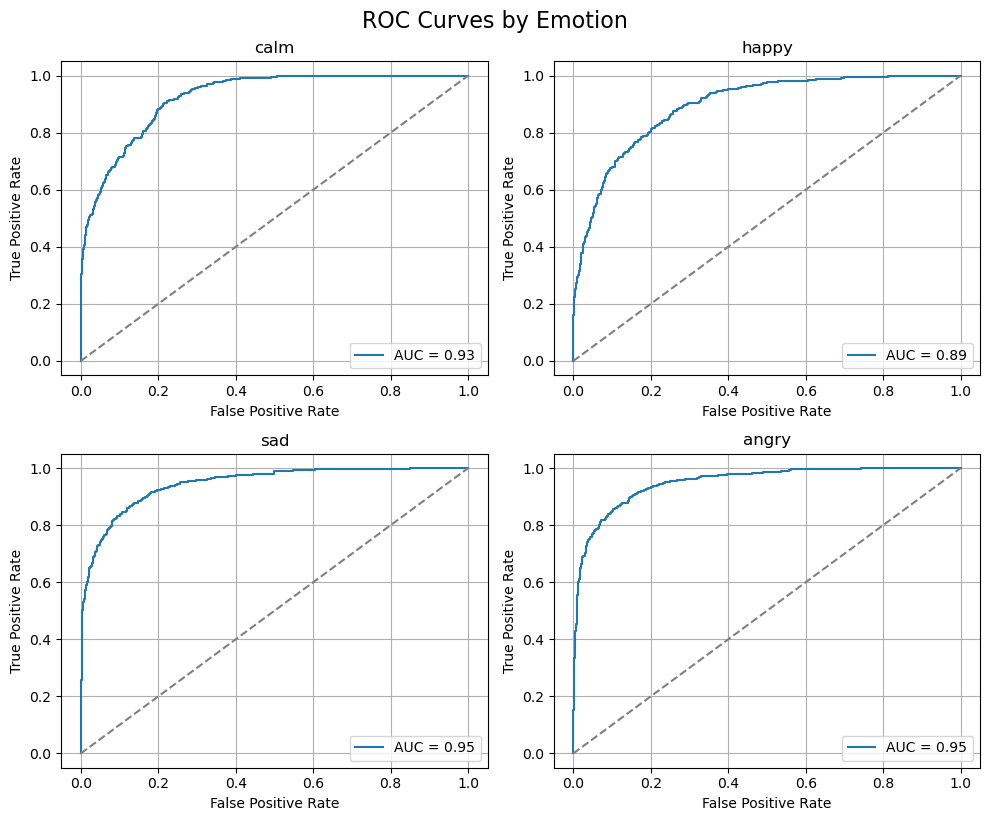

Training stacked ensemble for: calm
Training stacked ensemble for: happy
Training stacked ensemble for: sad
Training stacked ensemble for: angry


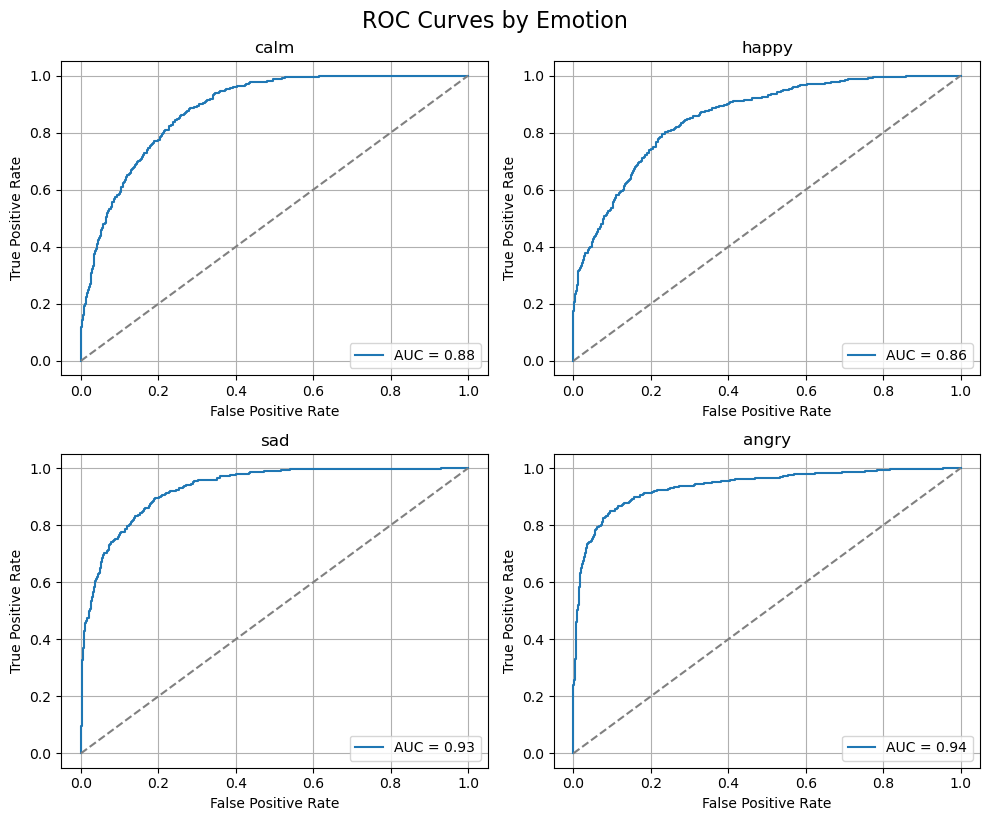

Training stacked ensemble for: calm
Training stacked ensemble for: happy
Training stacked ensemble for: sad
Training stacked ensemble for: angry


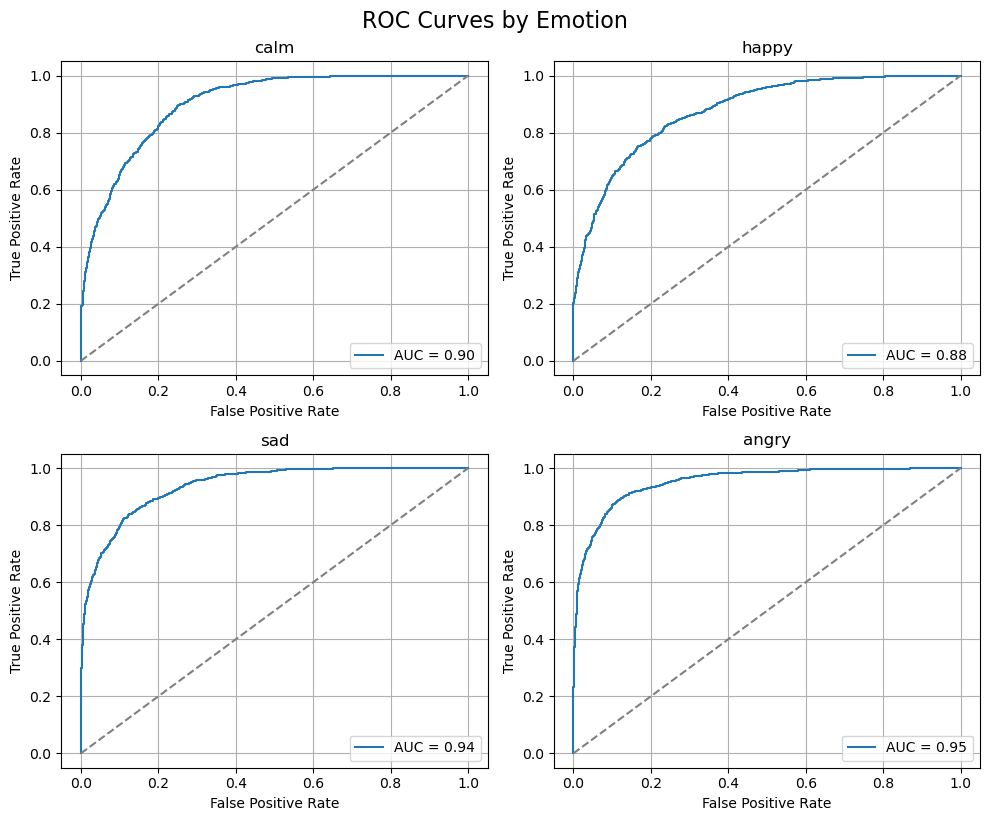

Training stacked ensemble for: calm
Training stacked ensemble for: happy
Training stacked ensemble for: sad
Training stacked ensemble for: angry


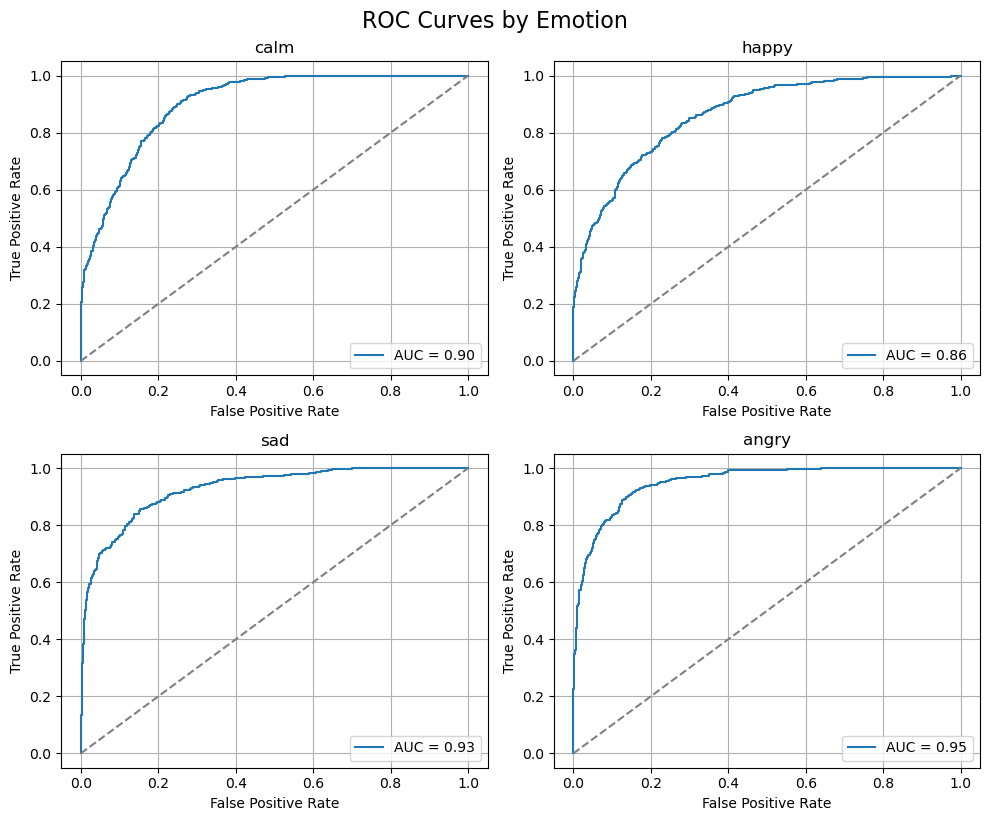

Training stacked ensemble for: calm
Training stacked ensemble for: happy
Training stacked ensemble for: sad
Training stacked ensemble for: angry


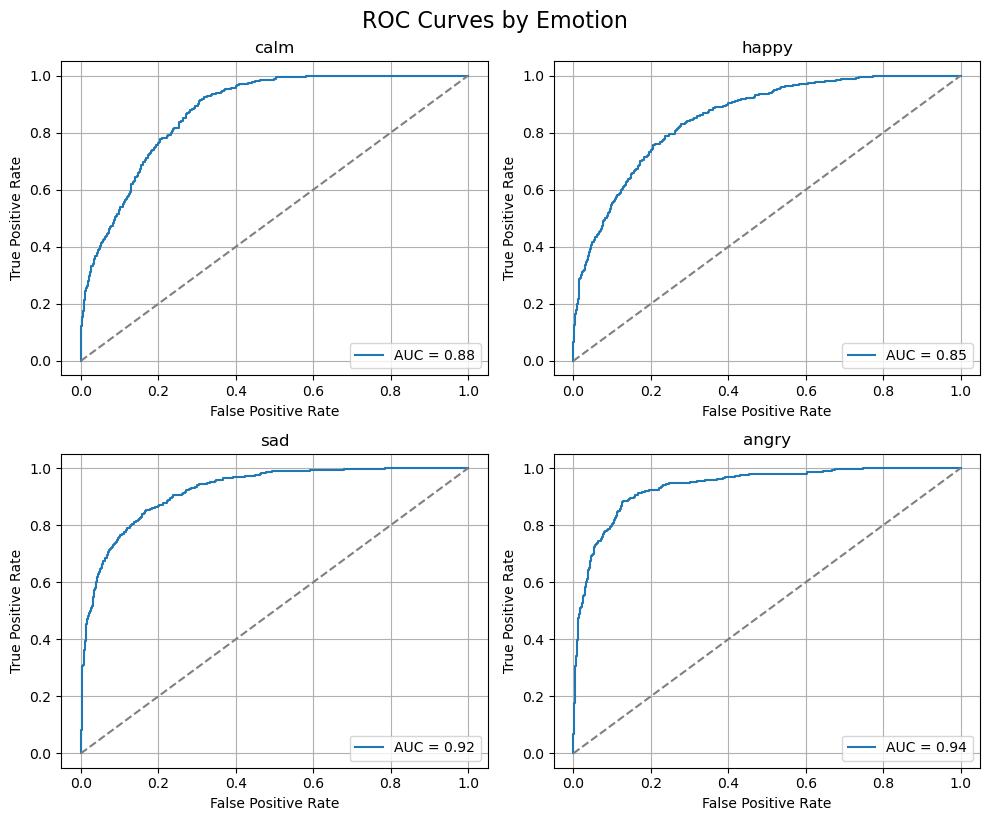

Training stacked ensemble for: calm
Training stacked ensemble for: happy
Training stacked ensemble for: sad
Training stacked ensemble for: angry


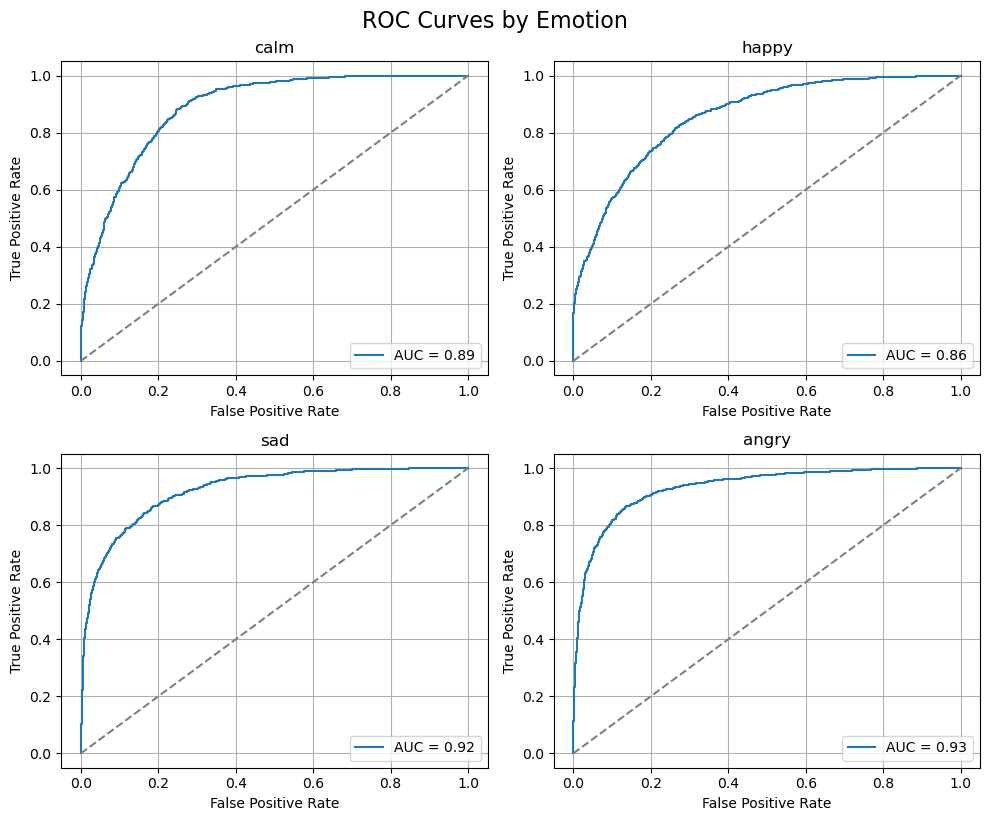

In [542]:
# TAKES 7 MINUTES TO RUN !!!!!
# only take plots for first 4 (original)

ovr_original, y_true_original = prepare_ovr_data(features_df_concatenated[features_df_concatenated.source == "original"], False)
ovr_augmented, y_true_augmented = prepare_ovr_data(features_df_concatenated[features_df_concatenated.source == "augmented"], False)
ovr_combined, y_true_combined = prepare_ovr_data(features_df_concatenated, False)

ensemble_original = train_ensemble(ovr_original)
ensemble_augmented = train_ensemble(ovr_augmented)
ensemble_combined = train_ensemble(ovr_combined)


#filtered by feature importance
ovr_original_filtered, y_true_original_filtered = prepare_ovr_data(features_df_concatenated_filtered[features_df_concatenated_filtered.source == "original"], False)
ovr_augmented_filtered, y_true_augmented_filtered = prepare_ovr_data(features_df_concatenated_filtered[features_df_concatenated_filtered.source == "augmented"], False)
ovr_combined_filtered, y_true_combined_filtered = prepare_ovr_data(features_df_concatenated_filtered, False)

ensemble_original_filtered = train_ensemble(ovr_original_filtered)
ensemble_augmented_filtered = train_ensemble(ovr_augmented_filtered)
ensemble_combined_filtered = train_ensemble(ovr_combined_filtered)

Getting Predictions

In [543]:
y_pred_original, y_prob_original, labels_original = predict_emotion(ensemble_original)
y_pred_augmented, y_prob_augmented, labels_augmented = predict_emotion(ensemble_augmented)
y_pred_combined, y_prob_combined, labels_combined = predict_emotion(ensemble_combined)

y_pred_original_filtered, y_prob_original_filtered, labels_original_filtered = predict_emotion(ensemble_original_filtered)
y_pred_augmented_filtered, y_prob_augmented_filtered, labels_augmented_filtered = predict_emotion(ensemble_augmented_filtered)
y_pred_combined_filtered, y_prob_combined_filtered, labels_combined_filtered = predict_emotion(ensemble_combined_filtered)


### Results and Evaluation

In [495]:
lb = LabelBinarizer()

Original Data


=== Original ===
Accuracy: 74.43%

Classification Report:
              precision    recall  f1-score   support

       angry     0.8213    0.8021    0.8116       384
        calm     0.6659    0.7414    0.7016       379
       happy     0.6921    0.6597    0.6755       385
         sad     0.8076    0.7740    0.7905       385

    accuracy                         0.7443      1533
   macro avg     0.7467    0.7443    0.7448      1533
weighted avg     0.7470    0.7443    0.7449      1533



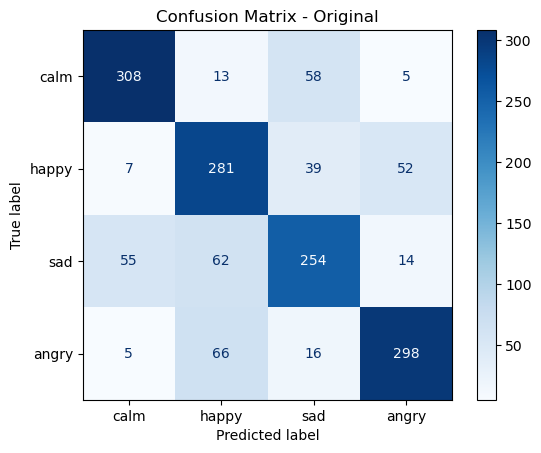

Micro AUC: 0.2605


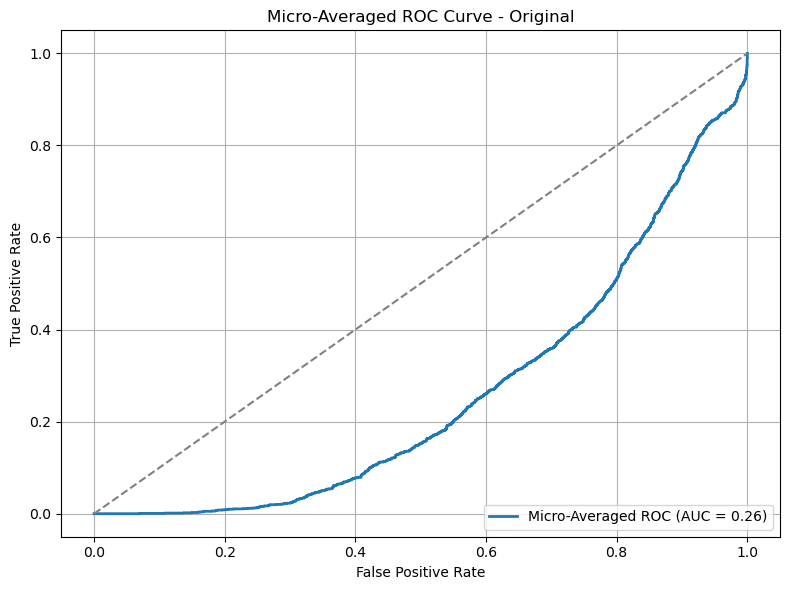

In [ ]:
lb.fit(y_true_original)
evaluate_predictions(y_true_original, y_pred_original, y_prob_original, title="Original")

Augmented Data


=== Augmented ===
Accuracy: 70.19%

Classification Report:
              precision    recall  f1-score   support

       angry     0.8210    0.7526    0.7853       384
        calm     0.6057    0.7256    0.6603       379
       happy     0.6510    0.6104    0.6300       385
         sad     0.7568    0.7195    0.7377       385

    accuracy                         0.7019      1533
   macro avg     0.7086    0.7020    0.7033      1533
weighted avg     0.7090    0.7019    0.7034      1533



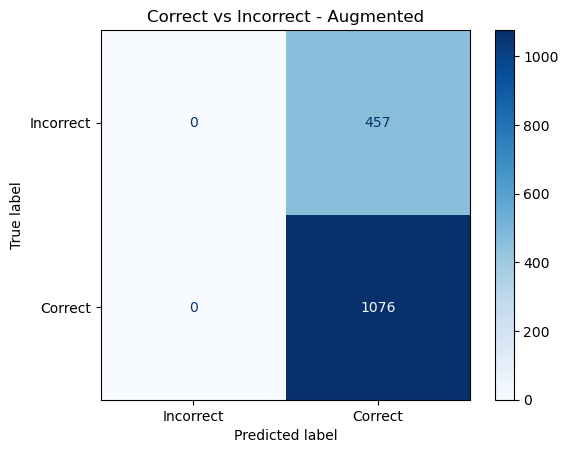

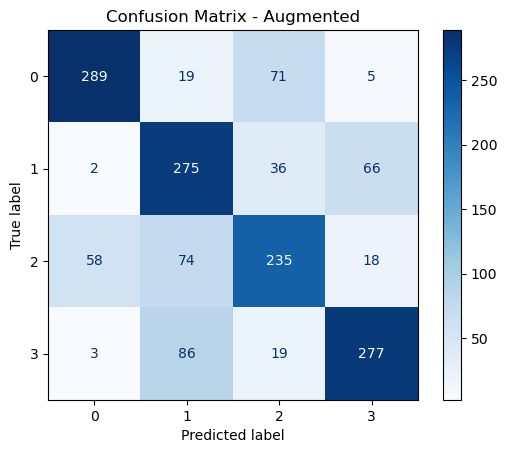

AUC: 0.2623


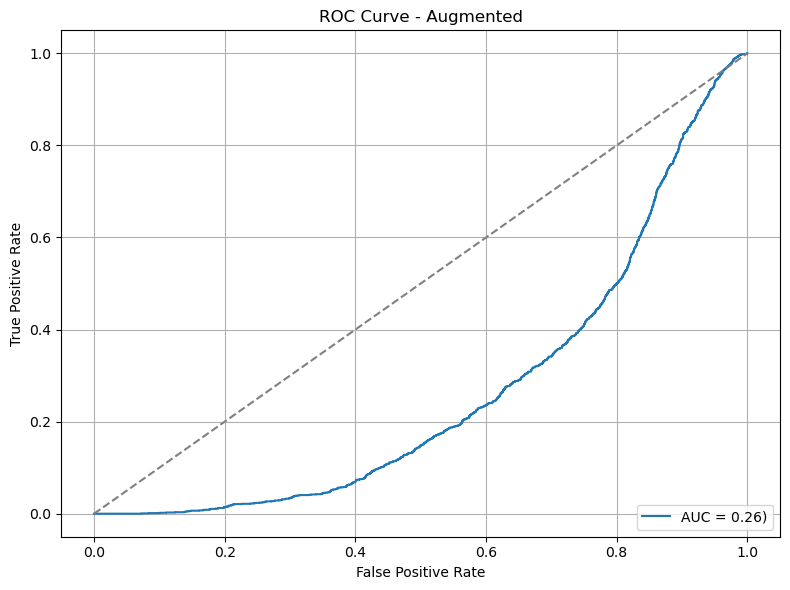

In [519]:
lb.fit(y_true_augmented)
evaluate_predictions(y_true_augmented, y_pred_augmented, y_prob_augmented, title="Augmented")

Original + Augmented Data


=== Combined ===
Accuracy: 71.40%

Classification Report:
              precision    recall  f1-score   support

       angry     0.7949    0.7763    0.7855       769
        calm     0.6524    0.7032    0.6768       758
       happy     0.6858    0.6073    0.6441       769
         sad     0.7246    0.7688    0.7461       770

    accuracy                         0.7140      3066
   macro avg     0.7144    0.7139    0.7131      3066
weighted avg     0.7146    0.7140    0.7133      3066



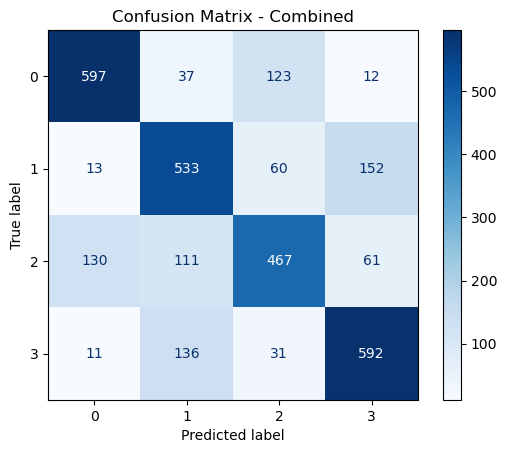

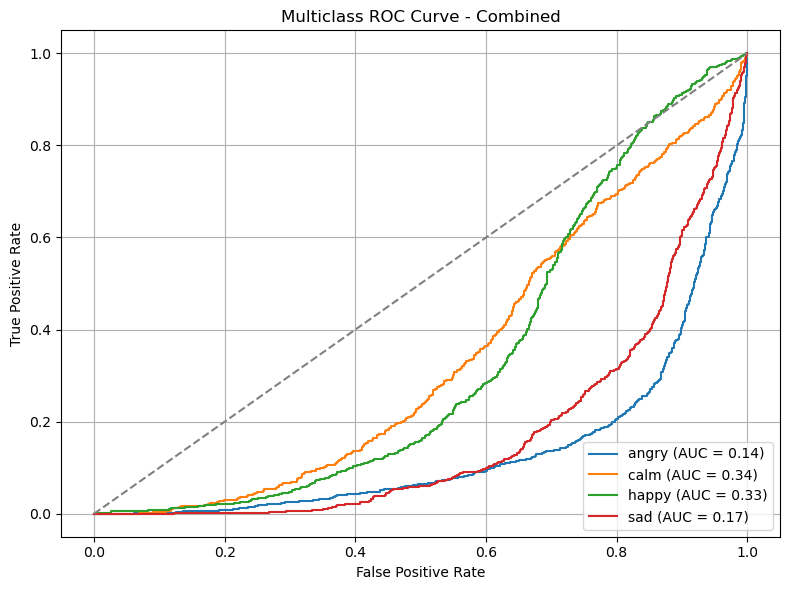

In [509]:
lb.fit(y_true_combined)
evaluate_predictions(y_true_combined, y_pred_combined, y_prob_combined, title="Combined")

#### Filtered

Original Data


=== Original (Filtered) ===
Accuracy: 70.65%

Classification Report:
              precision    recall  f1-score   support

       angry     0.7906    0.7865    0.7885       384
        calm     0.6232    0.6807    0.6507       379
       happy     0.6374    0.6026    0.6195       385
         sad     0.7802    0.7558    0.7678       385

    accuracy                         0.7065      1533
   macro avg     0.7078    0.7064    0.7066      1533
weighted avg     0.7081    0.7065    0.7068      1533



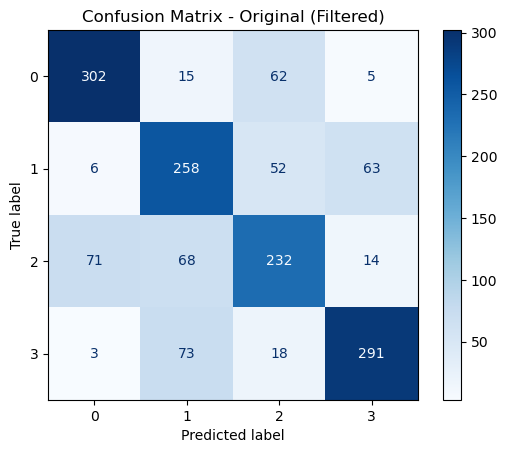

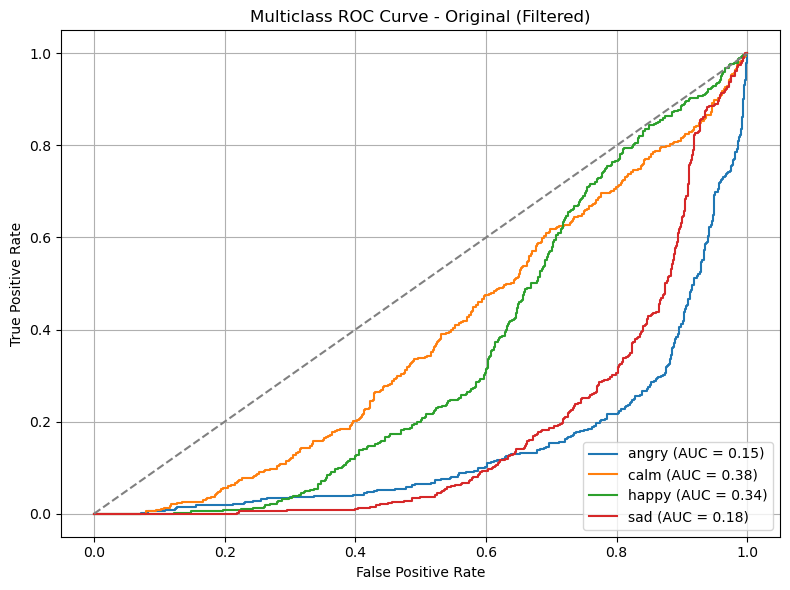

In [510]:
lb.fit(y_true_original_filtered)
evaluate_predictions(y_true_original_filtered, y_pred_original_filtered, y_prob_original_filtered, title="Original (Filtered)")

Augmented Data


=== Augmented (Filtered) ===
Accuracy: 69.47%

Classification Report:
              precision    recall  f1-score   support

       angry     0.8053    0.7865    0.7958       384
        calm     0.6061    0.6781    0.6401       379
       happy     0.6580    0.5948    0.6248       385
         sad     0.7176    0.7195    0.7185       385

    accuracy                         0.6947      1533
   macro avg     0.6968    0.6947    0.6948      1533
weighted avg     0.6971    0.6947    0.6950      1533



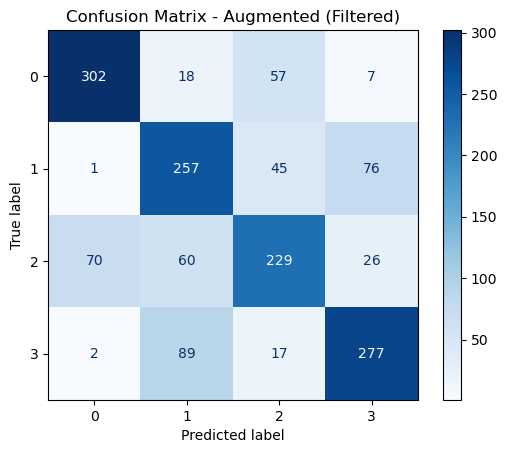

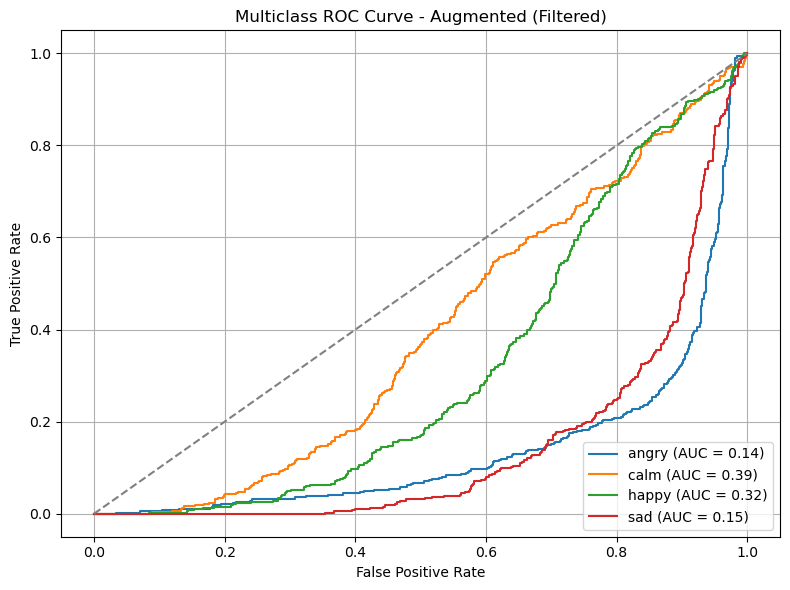

In [511]:
lb.fit(y_true_augmented_filtered)
evaluate_predictions(y_true_augmented_filtered, y_pred_augmented_filtered, y_prob_augmented_filtered, title="Augmented (Filtered)")

Original + Augmented Data


=== Combined (Filtered) ===
Accuracy: 68.07%

Classification Report:
              precision    recall  f1-score   support

       angry     0.7804    0.7672    0.7738       769
        calm     0.6114    0.6623    0.6358       758
       happy     0.6171    0.5618    0.5882       769
         sad     0.7136    0.7312    0.7223       770

    accuracy                         0.6807      3066
   macro avg     0.6806    0.6806    0.6800      3066
weighted avg     0.6809    0.6807    0.6802      3066



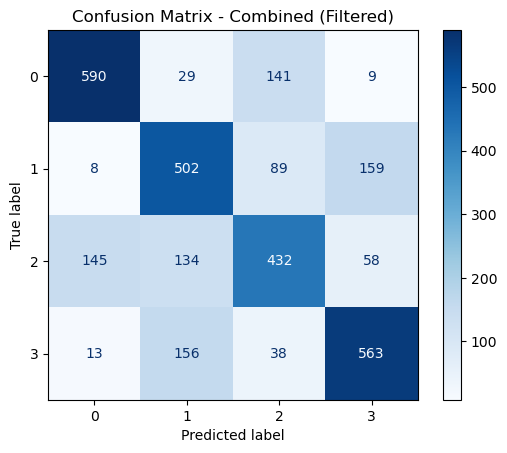

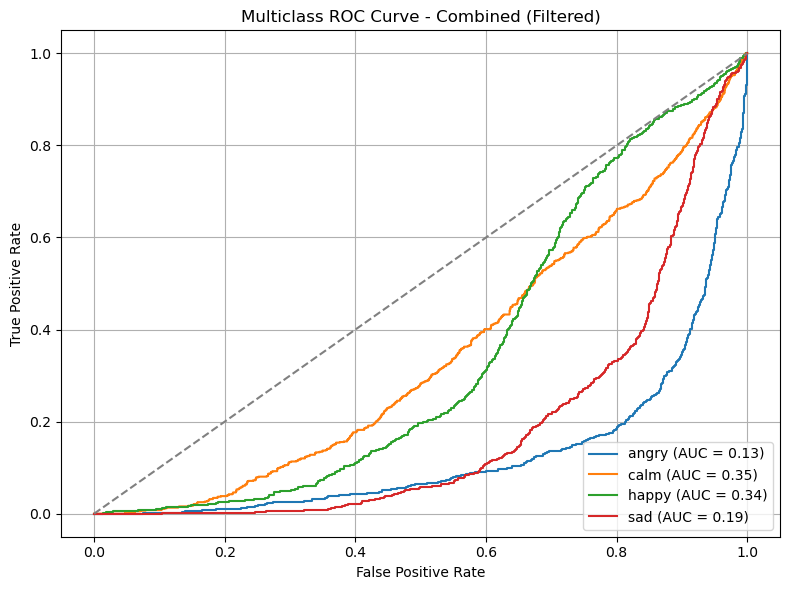

In [512]:
lb.fit(y_true_combined_filtered)
evaluate_predictions(y_true_combined_filtered, y_pred_combined_filtered, y_prob_combined_filtered, title="Combined (Filtered)")

## Comparison to CNN

performance dropped so much after using filtered data, just fitting cnn on non-filtered features

In [450]:
features_df = features_df_copy.copy()
features_df_augmented = features_df_augmented_copy.copy()
features_df_concatenated = features_df_concatenated_copy.copy()

On Original Data

In [451]:
X = features_df.drop(columns=["path", "source", "Emotions"])
y = features_df["Emotions"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, stratify=y, random_state=42)

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    InputLayer(input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.1)


y_pred_probs = model.predict(X_test_cnn)

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

y_pred_emotions = le.inverse_transform(y_pred_labels)
y_true_emotions = le.inverse_transform(y_true_labels)

print("Classification Report (CNN Model):")
print(classification_report(y_true_emotions, y_pred_emotions, digits=4))



Epoch 1/20


c:\Users\mattl\Anaconda3\envs\projectenv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3143 - loss: 1.3693 - val_accuracy: 0.4414 - val_loss: 1.2717
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4143 - loss: 1.2804 - val_accuracy: 0.4609 - val_loss: 1.2027
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4429 - loss: 1.2419 - val_accuracy: 0.4723 - val_loss: 1.1836
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4549 - loss: 1.2211 - val_accuracy: 0.4723 - val_loss: 1.1621
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4695 - loss: 1.1929 - val_accuracy: 0.4853 - val_loss: 1.1539
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4658 - loss: 1.2000 - val_accuracy: 0.4902 - val_loss: 1.1412
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4714 - loss: 1.1821 - val_accuracy: 0.4886 - val_loss: 1.1255
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4962 - loss: 1.1538 - val_accuracy: 0.4837 - val_

On just augmented data

In [452]:
X = features_df_augmented.drop(columns=["path", "source", "Emotions"])
y = features_df_augmented["Emotions"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, stratify=y, random_state=42)

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    InputLayer(input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.1)


y_pred_probs = model.predict(X_test_cnn)

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

y_pred_emotions = le.inverse_transform(y_pred_labels)
y_true_emotions = le.inverse_transform(y_true_labels)

print("Classification Report (CNN Model):")
print(classification_report(y_true_emotions, y_pred_emotions, digits=4))



Epoch 1/20


c:\Users\mattl\Anaconda3\envs\projectenv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3198 - loss: 1.3509 - val_accuracy: 0.4593 - val_loss: 1.1629
Epoch 2/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4282 - loss: 1.1754 - val_accuracy: 0.4642 - val_loss: 1.1308
Epoch 3/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4579 - loss: 1.1389 - val_accuracy: 0.4674 - val_loss: 1.1111
Epoch 4/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4623 - loss: 1.1255 - val_accuracy: 0.4853 - val_loss: 1.0953
Epoch 5/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4750 - loss: 1.1028 - val_accuracy: 0.4821 - val_loss: 1.0816
Epoch 6/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4771 - loss: 1.1120 - val_accuracy: 0.4984 - val_loss: 1.0696
Epoch 7/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4895 - loss: 1.0806 - val_accuracy: 0.5016 - val_loss: 1.0648
Epoch 8/20
173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4894 - loss: 1.0797 - val_accuracy: 0.4951 - val_

On combined data

In [453]:
X = features_df_concatenated.drop(columns=["path", "source", "Emotions"])
y = features_df_concatenated["Emotions"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_cat = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_cat, test_size=0.2, stratify=y, random_state=42)

X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

model = Sequential([
    InputLayer(input_shape=(X_train_cnn.shape[1], 1)),
    Conv1D(64, kernel_size=3, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(y_cat.shape[1], activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_cnn, y_train, epochs=20, batch_size=32, validation_split=0.1)


y_pred_probs = model.predict(X_test_cnn)

y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

y_pred_emotions = le.inverse_transform(y_pred_labels)
y_true_emotions = le.inverse_transform(y_true_labels)

print("Classification Report (CNN Model):")
print(classification_report(y_true_emotions, y_pred_emotions, digits=4))



Epoch 1/20


c:\Users\mattl\Anaconda3\envs\projectenv\Lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


345/345 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3159 - loss: 1.3663 - val_accuracy: 0.4262 - val_loss: 1.2501
Epoch 2/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3968 - loss: 1.2627 - val_accuracy: 0.4230 - val_loss: 1.2114
Epoch 3/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4256 - loss: 1.2409 - val_accuracy: 0.4344 - val_loss: 1.1961
Epoch 4/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4318 - loss: 1.2133 - val_accuracy: 0.4540 - val_loss: 1.1701
Epoch 5/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4398 - loss: 1.1838 - val_accuracy: 0.4711 - val_loss: 1.1475
Epoch 6/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4661 - loss: 1.1597 - val_accuracy: 0.4694 - val_loss: 1.1288
Epoch 7/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4752 - loss: 1.1435 - val_accuracy: 0.4874 - val_loss: 1.1199
Epoch 8/20
345/345 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4851 - loss: 1.1328 - val_accuracy: 0.4833 - val_

# WHAT NEEDS TO BE DONE

### Confusion Matrices
### ROC Curves
### AUC Curve